In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#### Read The Data

In [3]:
df = pd.read_csv('Bike_Rent.csv')

In [4]:
df.head()

instant      dteday    season    yr mnth  hr holiday  weekday workingday  \
0        1  01-01-2011  springer  2011    1   0      No        6    No work   
1        2  01-01-2011  springer  2011    1   1      No        6    No work   
2        3  01-01-2011  springer  2011    1   2      No        6    No work   
3        4  01-01-2011  springer  2011    1   3      No        6    No work   
4        5  01-01-2011  springer  2011    1   4      No        6    No work   

  weathersit  temp   atemp   hum windspeed casual registered  cnt  
0      Clear  0.24  0.2879  0.81         0      3         13   16  
1      Clear  0.22  0.2727   0.8         0      8         32   40  
2      Clear  0.22  0.2727     ?         0      5         27   32  
3      Clear  0.24  0.2879  0.75         0      3         10   13  
4      Clear  0.24  0.2879  0.75         0      0          1    1

In [5]:
df.tail()

instant      dteday    season    yr mnth  hr holiday  weekday  \
17374    17375  31-12-2012  springer  2012   12  19      No        1   
17375    17376  31-12-2012  springer  2012   12  20      No        1   
17376    17377  31-12-2012  springer  2012   12  21      No        1   
17377    17378  31-12-2012  springer  2012   12  22      No        1   
17378    17379  31-12-2012  springer  2012   12  23      No        1   

        workingday weathersit  temp   atemp   hum windspeed casual registered  \
17374  Working Day       Mist  0.26  0.2576   0.6    0.1642     11        108   
17375  Working Day       Mist  0.26  0.2576   0.6    0.1642      8         81   
17376  Working Day      Clear     ?  0.2576   0.6    0.1642      7         83   
17377  Working Day      Clear  0.26  0.2727  0.56    0.1343     13         48   
17378            ?      Clear  0.26  0.2727  0.65    0.1343     12         37   

       cnt  
17374  119  
17375   89  
17376   90  
17377   61  
17378   49

In [6]:
df["weathersit"].unique()

array(['Clear', 'Mist', '?', 'Light Snow', 'Heavy Rain'], dtype=object)

#### EDA

In [7]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [8]:
df.shape

(17379, 17)

In [9]:
df.duplicated().value_counts()

False    17379
dtype: int64

In [10]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   instant     17379 non-null  int64 
 1   dteday      17379 non-null  object
 2   season      17379 non-null  object
 3   yr          17379 non-null  object
 4   mnth        17379 non-null  object
 5   hr          17379 non-null  int64 
 6   holiday     17379 non-null  object
 7   weekday     17379 non-null  int64 
 8   workingday  17379 non-null  object
 9   weathersit  17379 non-null  object
 10  temp        17379 non-null  object
 11  atemp       17379 non-null  object
 12  hum         17379 non-null  object
 13  windspeed   17379 non-null  object
 14  casual      17379 non-null  object
 15  registered  17379 non-null  object
 16  cnt         17379 non-null  int64 
dtypes: int64(4), object(13)
memory usage: 2.3+ MB


In [12]:
df.replace('?', np.nan, inplace=True)

In [13]:
df.dropna(inplace=True)

In [14]:
df.drop('instant', axis=1, inplace=True)

In [15]:
df['dteday'] = pd.to_datetime(df['dteday'], format='%d-%m-%Y')

In [16]:
df[['yr', 'mnth','casual','registered']] = df[['yr', 'mnth','casual','registered']].astype(int) 
df[['temp', 'atemp', 'hum', 'windspeed']] = df[['temp', 'atemp', 'hum', 'windspeed']].astype(float)

In [17]:
df.describe().T

count         mean         std      min        25%        50%  \
yr          17339.0  2011.502336    0.500009  2011.00  2011.0000  2012.0000   
mnth        17339.0     6.535325    3.432616     1.00     4.0000     7.0000   
hr          17339.0    11.544899    6.915829     0.00     6.0000    12.0000   
weekday     17339.0     3.004095    2.005281     0.00     1.0000     3.0000   
temp        17339.0     0.497527    0.192425     0.02     0.3400     0.5000   
atemp       17339.0     0.476263    0.171722     0.00     0.3333     0.4848   
hum         17339.0     0.627150    0.192993     0.00     0.4800     0.6300   
windspeed   17339.0     0.190075    0.122302     0.00     0.1045     0.1940   
casual      17339.0    35.727147   49.345251     0.00     4.0000    17.0000   
registered  17339.0   154.006171  151.443491     0.00    34.0000   116.0000   
cnt         17339.0   189.733318  181.487048     1.00    40.0000   142.0000   

                  75%        max  
yr          2012.0000  2012.0000  
mnth          10.0000    12.0000  
hr            18.0000    23.0000  
weekday        5.0000     6.0000  
temp           0.6600     1.0000  
atemp          0.6212     1.0000  
hum            0.7800     1.0000  
windspeed      0.2537     0.8507  
casual        48.0000   367.0000  
registered   220.0000   886.0000  
cnt          281.0000   977.0000

In [18]:
df.nunique()

dteday        731
season          4
yr              2
mnth           12
hr             24
holiday         2
weekday         7
workingday      2
weathersit      4
temp           50
atemp          65
hum            89
windspeed      30
casual        322
registered    776
cnt           869
dtype: int64

In [19]:
df.shape

(17339, 16)

In [20]:
df['season'].value_counts()

fall        4496
summer      4409
winter      4232
springer    4202
Name: season, dtype: int64

In [21]:
df['weathersit'].value_counts()

Clear         11400
Mist           4522
Light Snow     1414
Heavy Rain        3
Name: weathersit, dtype: int64

In [22]:
df['holiday'].value_counts()

No     16845
Yes      494
Name: holiday, dtype: int64

In [23]:
df['workingday'].value_counts()

Working Day    11844
No work         5495
Name: workingday, dtype: int64

#### Data Visualization

In [24]:
numerical_features = []
categorical_features = []

for col in df.columns:  
    if df[col].nunique() > 25:
        numerical_features.append(col) 
    else:
        categorical_features.append(col) 

In [25]:
print(f'Numerical Features : {numerical_features}')
print(f'Categorical Features : {categorical_features}')

Numerical Features : ['dteday', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
Categorical Features : ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']


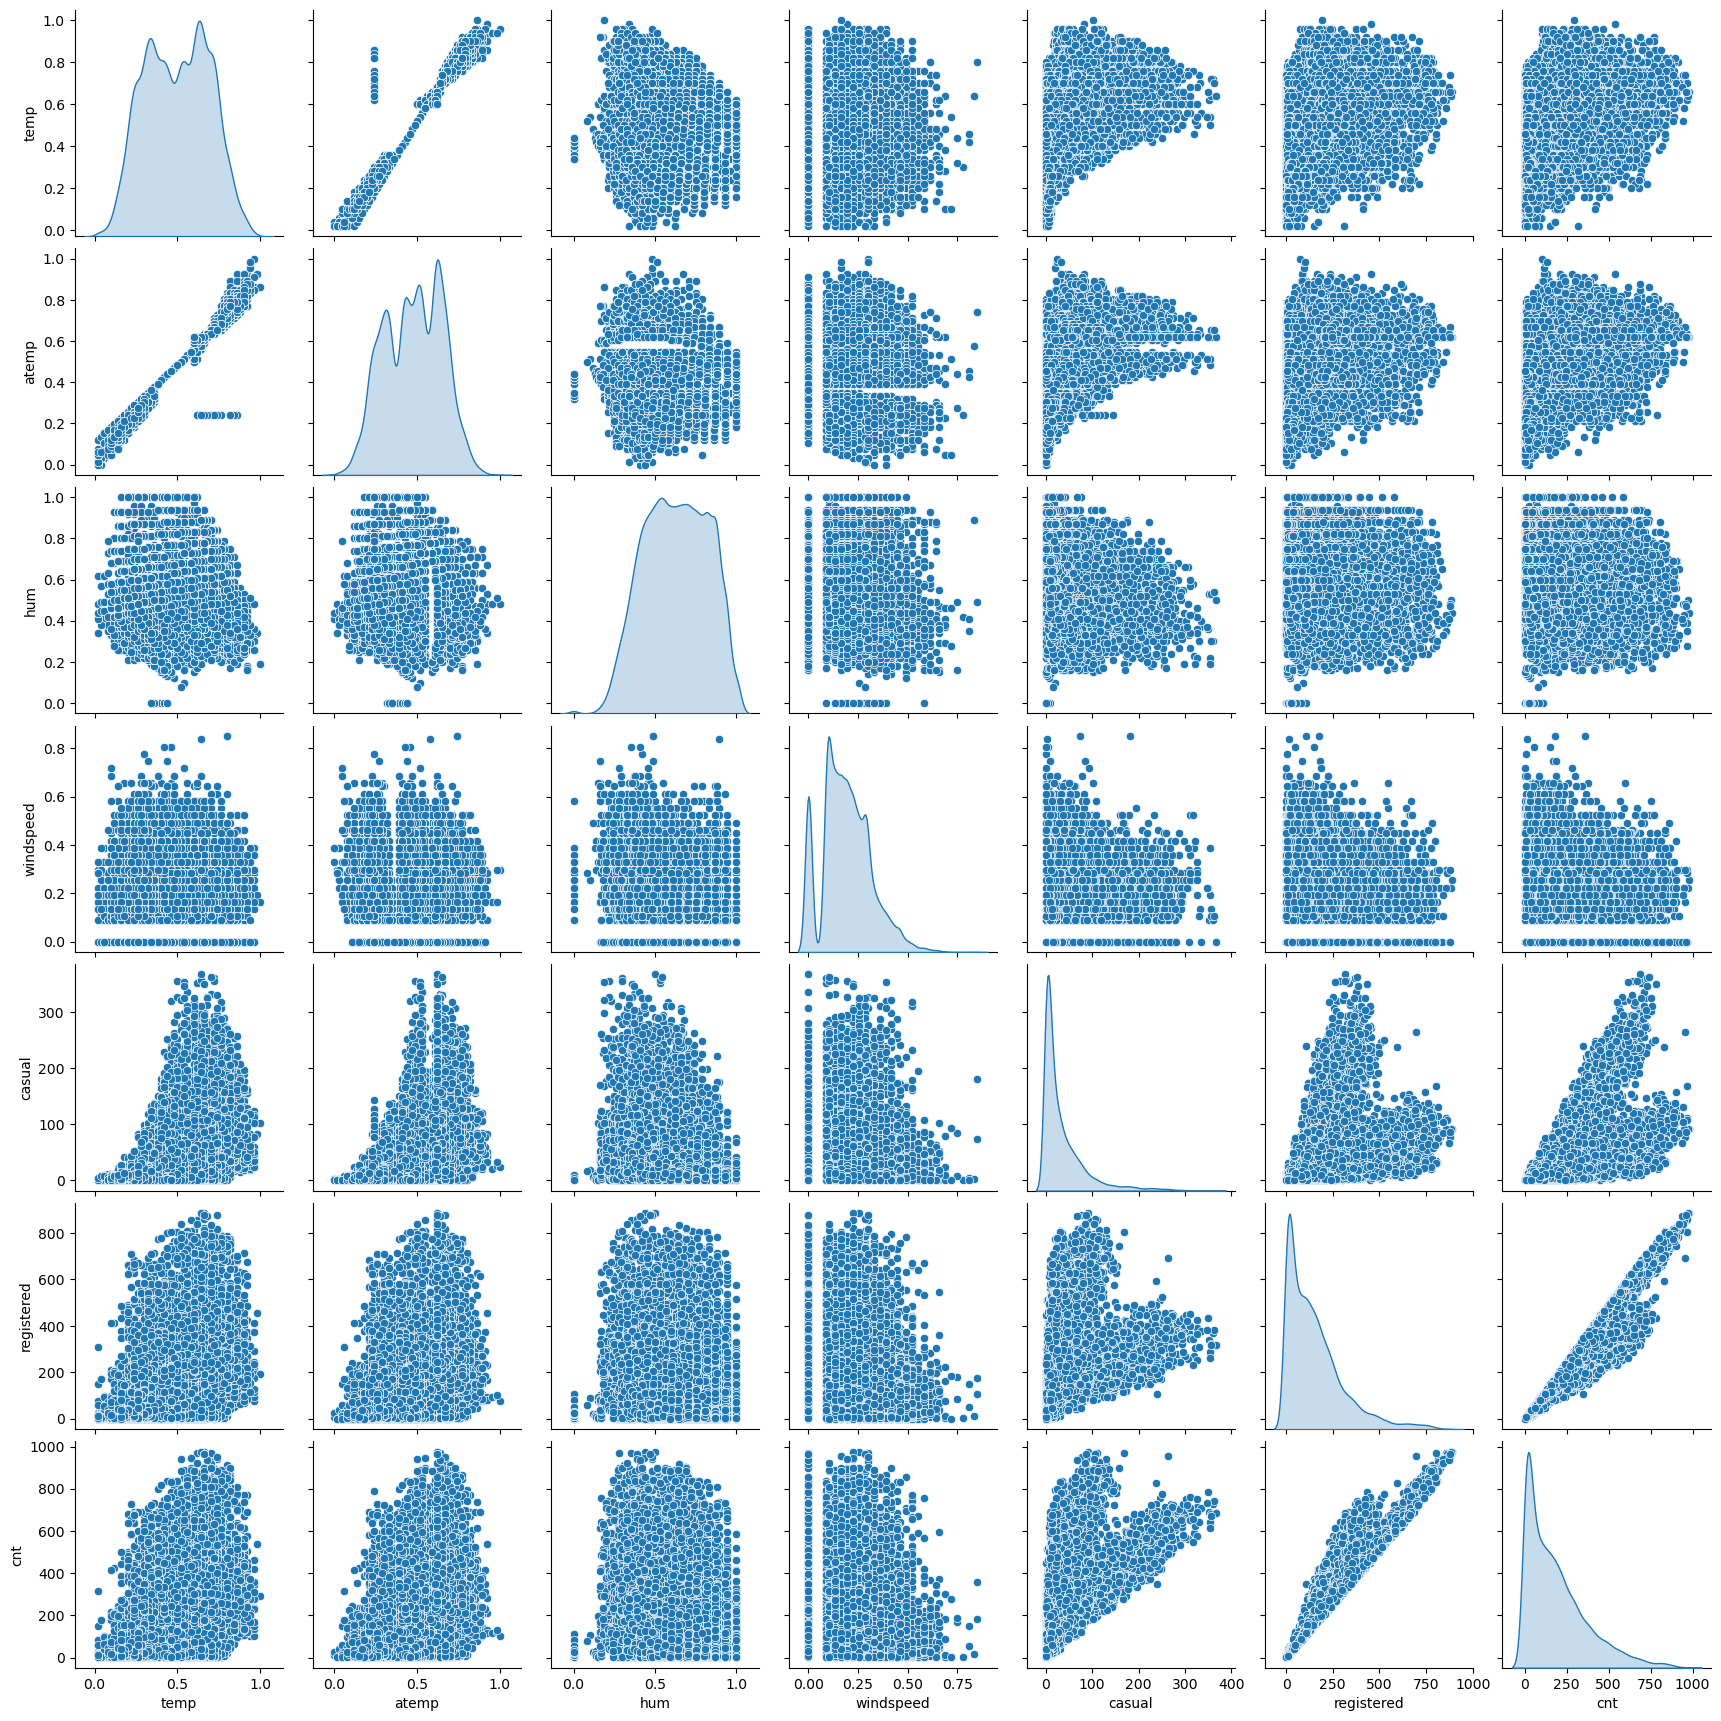

In [26]:
numerical_features = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
numerical_features_df = df[numerical_features]

sns.pairplot(numerical_features_df, diag_kind='kde')
plt.show()

In [27]:
if 'cnt' in numerical_features:
    numerical_features.remove('cnt')

In [28]:
print(f'Numerical Features : {numerical_features}')

Numerical Features : ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']


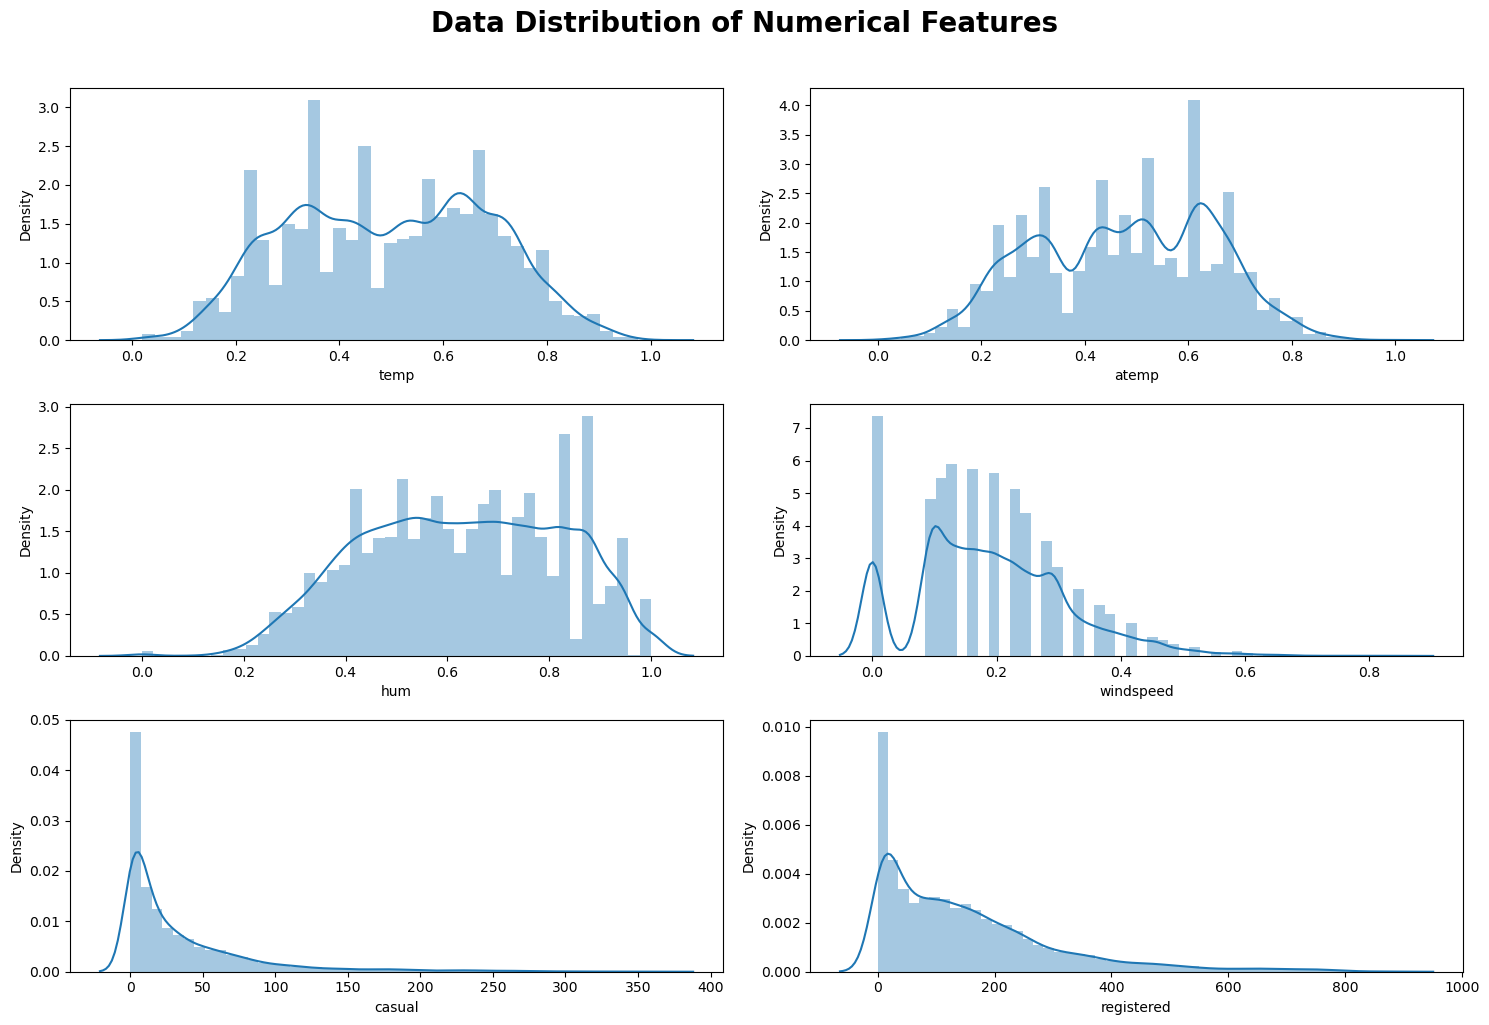

In [29]:
plt.figure(figsize=(15, 10))
plt.suptitle('Data Distribution of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i, col in enumerate(numerical_features):
    plt.subplot(3,2, i+1)
    sns.distplot(df[col])
    plt.xlabel(col)

plt.tight_layout()
plt.show()

None of the Numerical Features follow Normal Distribution.

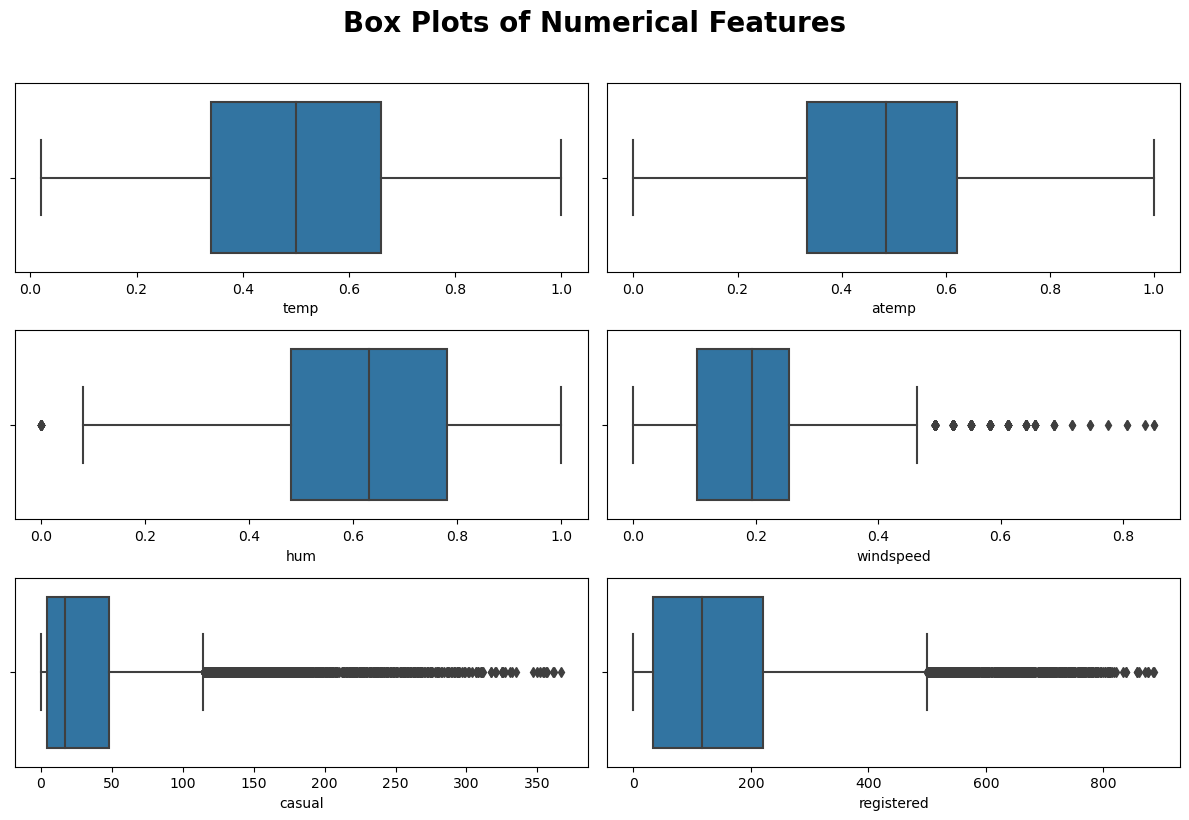

In [30]:
plt.figure(figsize=(12, 8))
plt.suptitle('Box Plots of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i, col in enumerate(numerical_features):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=df[col])
    plt.xlabel(col)

plt.tight_layout()
plt.show()

The presence of outliers can be seen in Windspeed, Casual and Registered Columns.

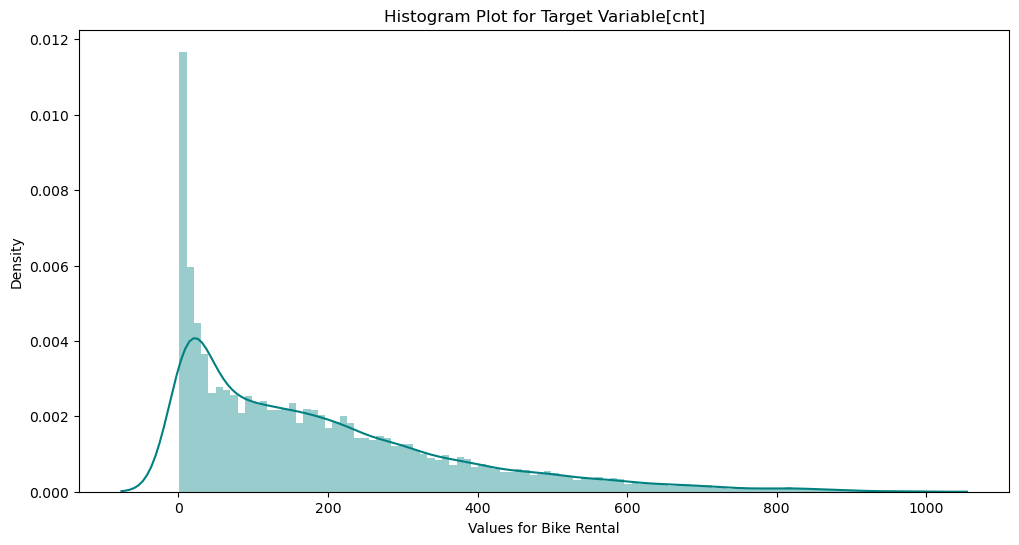

In [31]:
plt.figure(figsize=(12,6))
sns.distplot(df['cnt'],bins=100,color='teal')
plt.title('Histogram Plot for Target Variable[cnt]')
plt.xlabel('Values for Bike Rental')
plt.show() 

The plot shows a right skewed distribution.

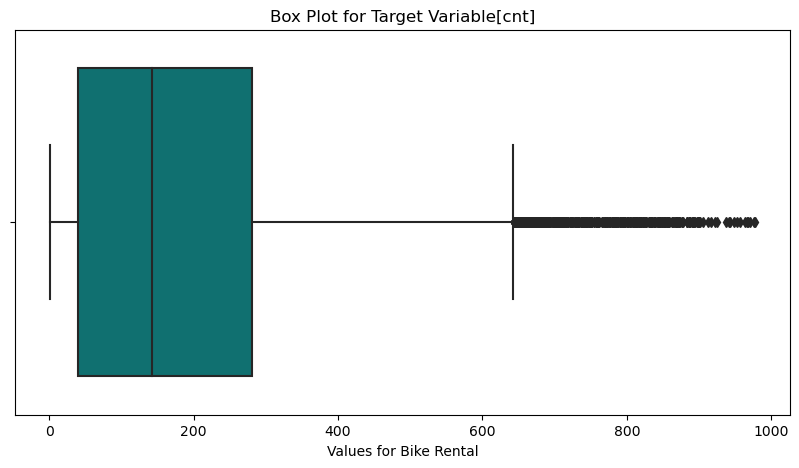

In [32]:
plt.figure(figsize=(10,5))
sns.boxplot(x='cnt',data=df,color='teal')
plt.title('Box Plot for Target Variable[cnt]')
plt.xlabel('Values for Bike Rental')
plt.show()

There is presence of outliers in Count Column of the dataset. The median is somewhere around 150.

#### Visualization for Relationship between Numerical Features and Target Variable[cnt]

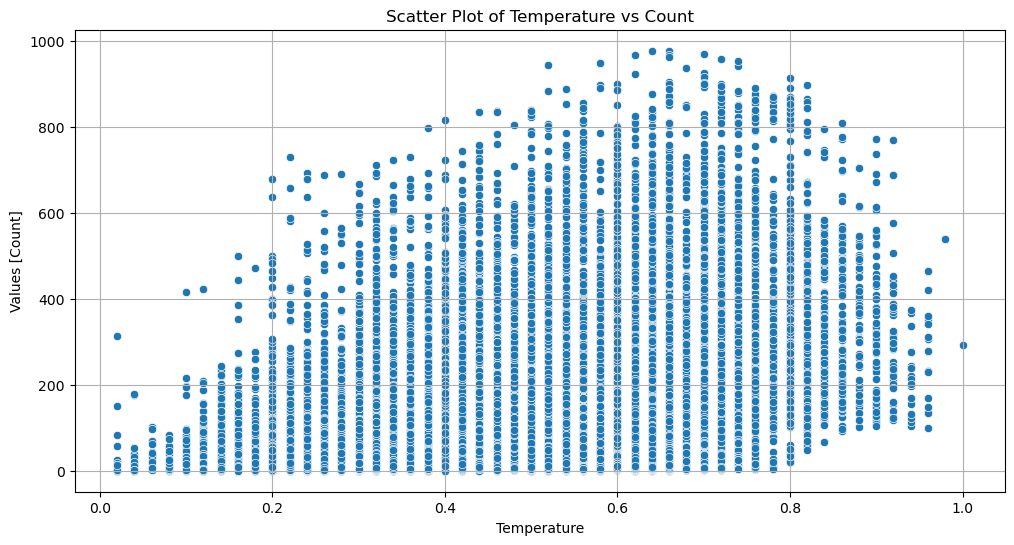

In [33]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='temp', y='cnt')
plt.title('Scatter Plot of Temperature vs Count')
plt.xlabel('Temperature')
plt.ylabel('Values [Count]')
plt.grid(True)
plt.show()

In [34]:
temp_bin = [0.0, 0.2, 0.4, 0.6,0.8,1.0]
bin_labels = ['0.0 - 0.2', '0.2 - 0.4', '0.4 - 0.6', '0.6 - 0.8','0.8 - 1.0']
df['tempbin'] = pd.cut(df['temp'], bins=temp_bin, labels=bin_labels, include_lowest=True)

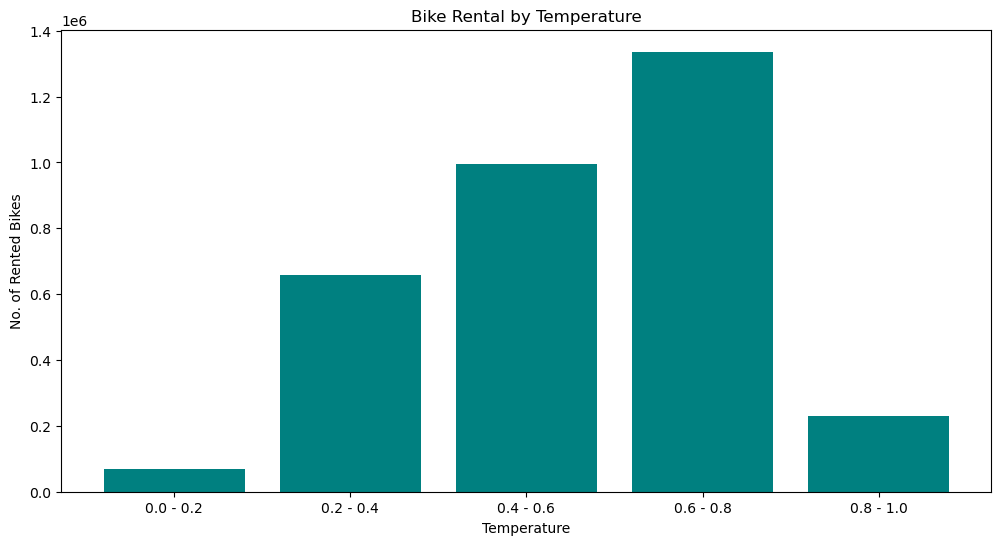

In [35]:
Temp= df.groupby('tempbin')['cnt'].sum()

plt.figure(figsize=(12,6))
plt.bar(Temp.index, Temp.values, color='teal')
plt.xlabel('Temperature')
plt.ylabel('No. of Rented Bikes')
plt.title('Bike Rental by Temperature')
plt.xticks(Temp.index)
plt.show()

At higher temperature the number of bikes rented decreases.

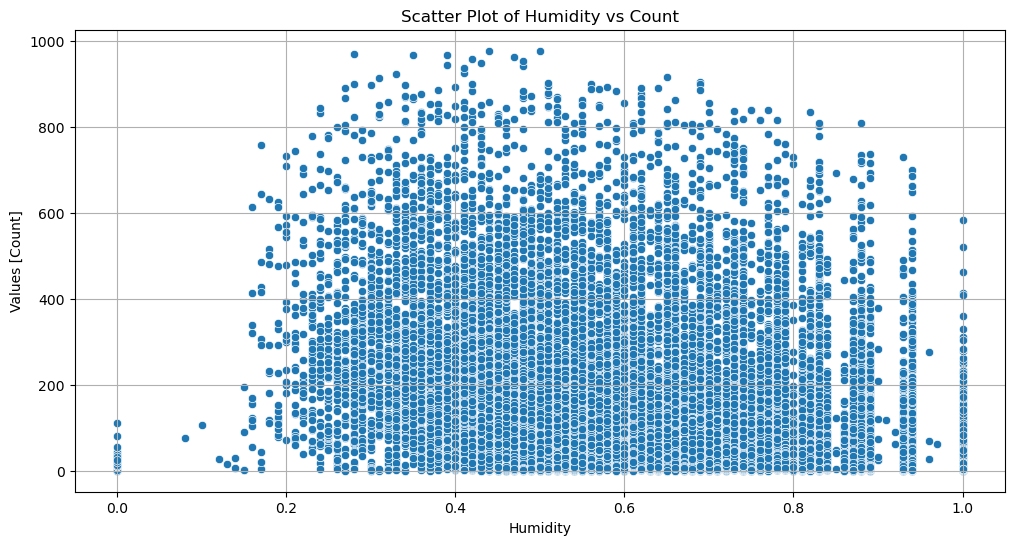

In [36]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='hum', y='cnt')
plt.title('Scatter Plot of Humidity vs Count')
plt.xlabel('Humidity')
plt.ylabel('Values [Count]')
plt.grid(True)
plt.show()

In [37]:
hum_bin = [0.0, 0.2, 0.4, 0.6,0.8,1.0]
bin_labels = ['0.0 - 0.2', '0.2 - 0.4', '0.4 - 0.6', '0.6 - 0.8','0.8 - 1.0']
df['humbin'] = pd.cut(df['hum'], bins=hum_bin, labels=bin_labels, include_lowest=True)

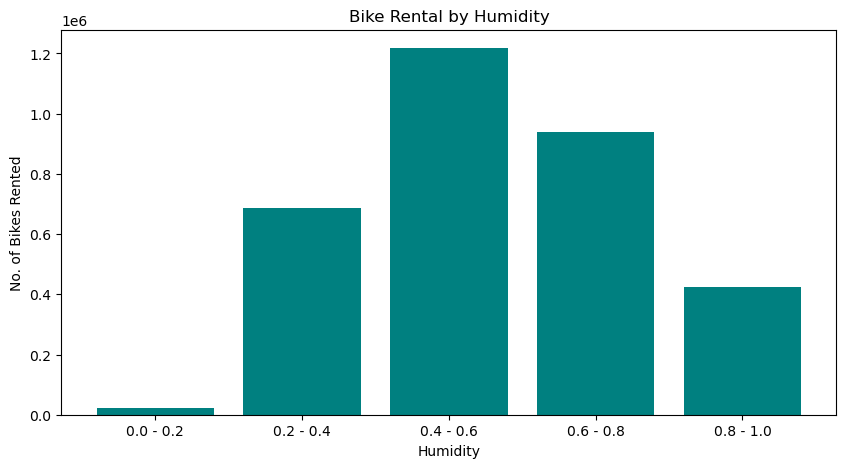

In [38]:
Hum= df.groupby('humbin')['cnt'].sum()

plt.figure(figsize=(10,5))
plt.bar(Hum.index, Hum.values, color='teal')
plt.xlabel('Humidity')
plt.ylabel('No. of Bikes Rented')
plt.title('Bike Rental by Humidity')
plt.xticks(Hum.index)
plt.show()

As humidity increases the number of bikes rented increases upto a certain point (0.4 - 0.6) and then starts to decrease.

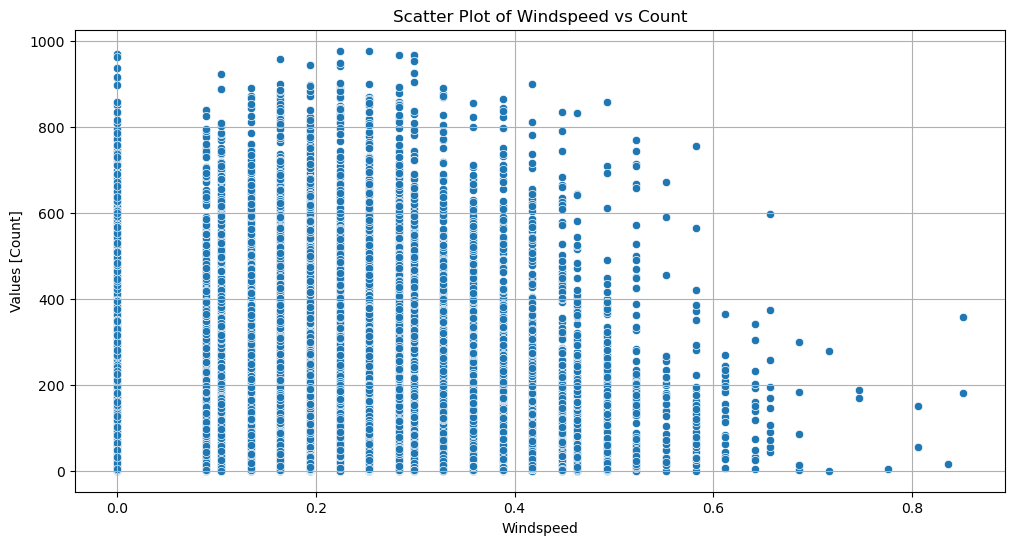

In [39]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='windspeed', y='cnt')
plt.title('Scatter Plot of Windspeed vs Count')
plt.xlabel('Windspeed')
plt.ylabel('Values [Count]')
plt.grid(True)
plt.show()

In [40]:
windspeed_bin = [0.0, 0.2, 0.4, 0.6,0.8]
bin_labels =  ['0.0 - 0.2', '0.2 - 0.4', '0.4 - 0.6', '0.6 - 0.8']
df['windbin'] = pd.cut(df['windspeed'], bins=windspeed_bin, labels=bin_labels, include_lowest=True)

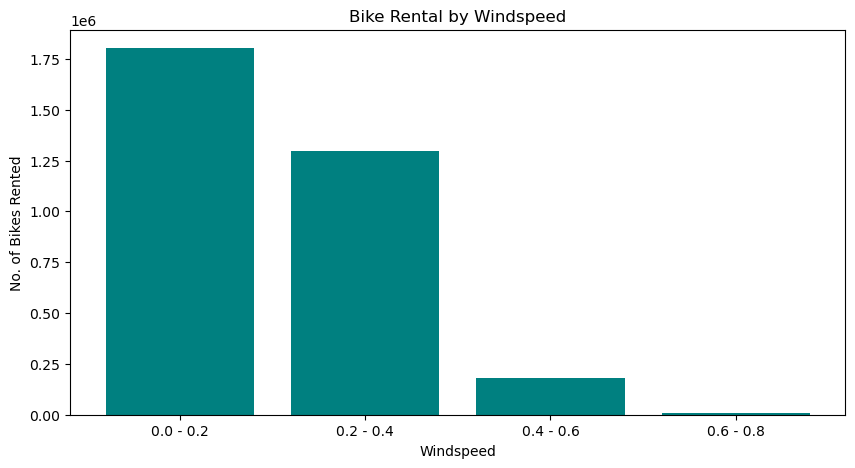

In [41]:
Windspeed= df.groupby('windbin')['cnt'].sum()

plt.figure(figsize=(10,5))
plt.bar(Windspeed.index, Windspeed.values, color='teal')
plt.xlabel('Windspeed')
plt.ylabel('No. of Bikes Rented')
plt.title('Bike Rental by Windspeed')
plt.xticks(Windspeed.index)
plt.show()

There is a negative relationship between windspeed and number of bikes rented.

#### Box Plot for Categorical Columns and Target Variable[cnt]

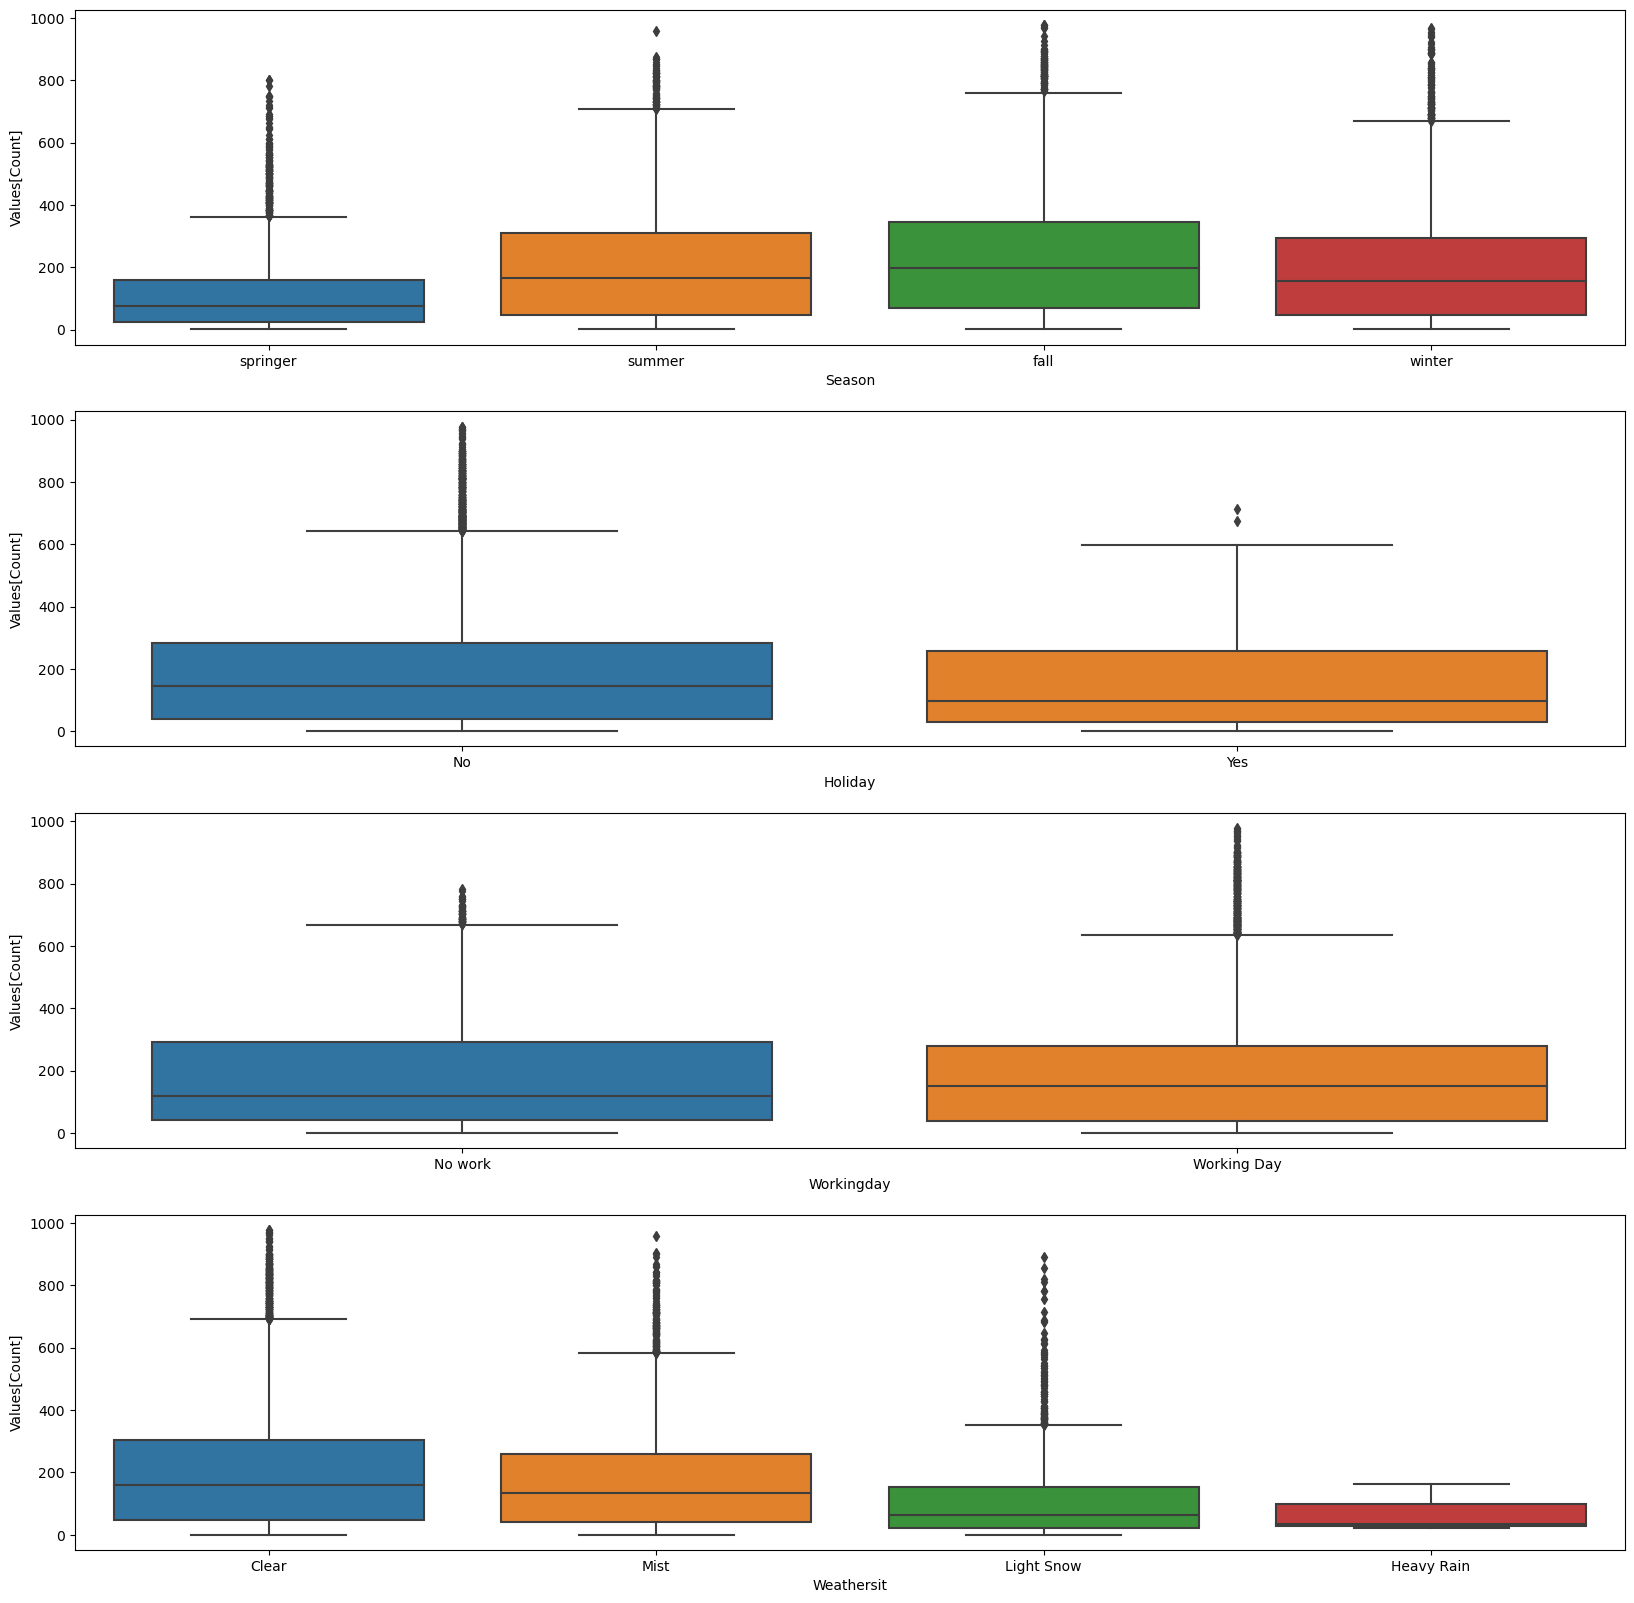

In [42]:
fig, axes = plt.subplots(nrows=4, ncols=1)
fig.set_size_inches(20, 20)

sns.boxplot(data=df, y='cnt', x='season', ax=axes[0])
sns.boxplot(data=df, y='cnt', x='holiday', ax=axes[1])
sns.boxplot(data=df, y='cnt', x='workingday', ax=axes[2])
sns.boxplot(data=df, y='cnt', x='weathersit', ax=axes[3])

axes[0].set(xlabel='Season', ylabel='Values[Count]')
axes[1].set(xlabel='Holiday', ylabel='Values[Count]')
axes[2].set(xlabel='Workingday', ylabel='Values[Count]')
axes[3].set(xlabel='Weathersit', ylabel='Values[Count]')


plt.show()

#### Box Plot for Date Features and Target Variable[cnt]

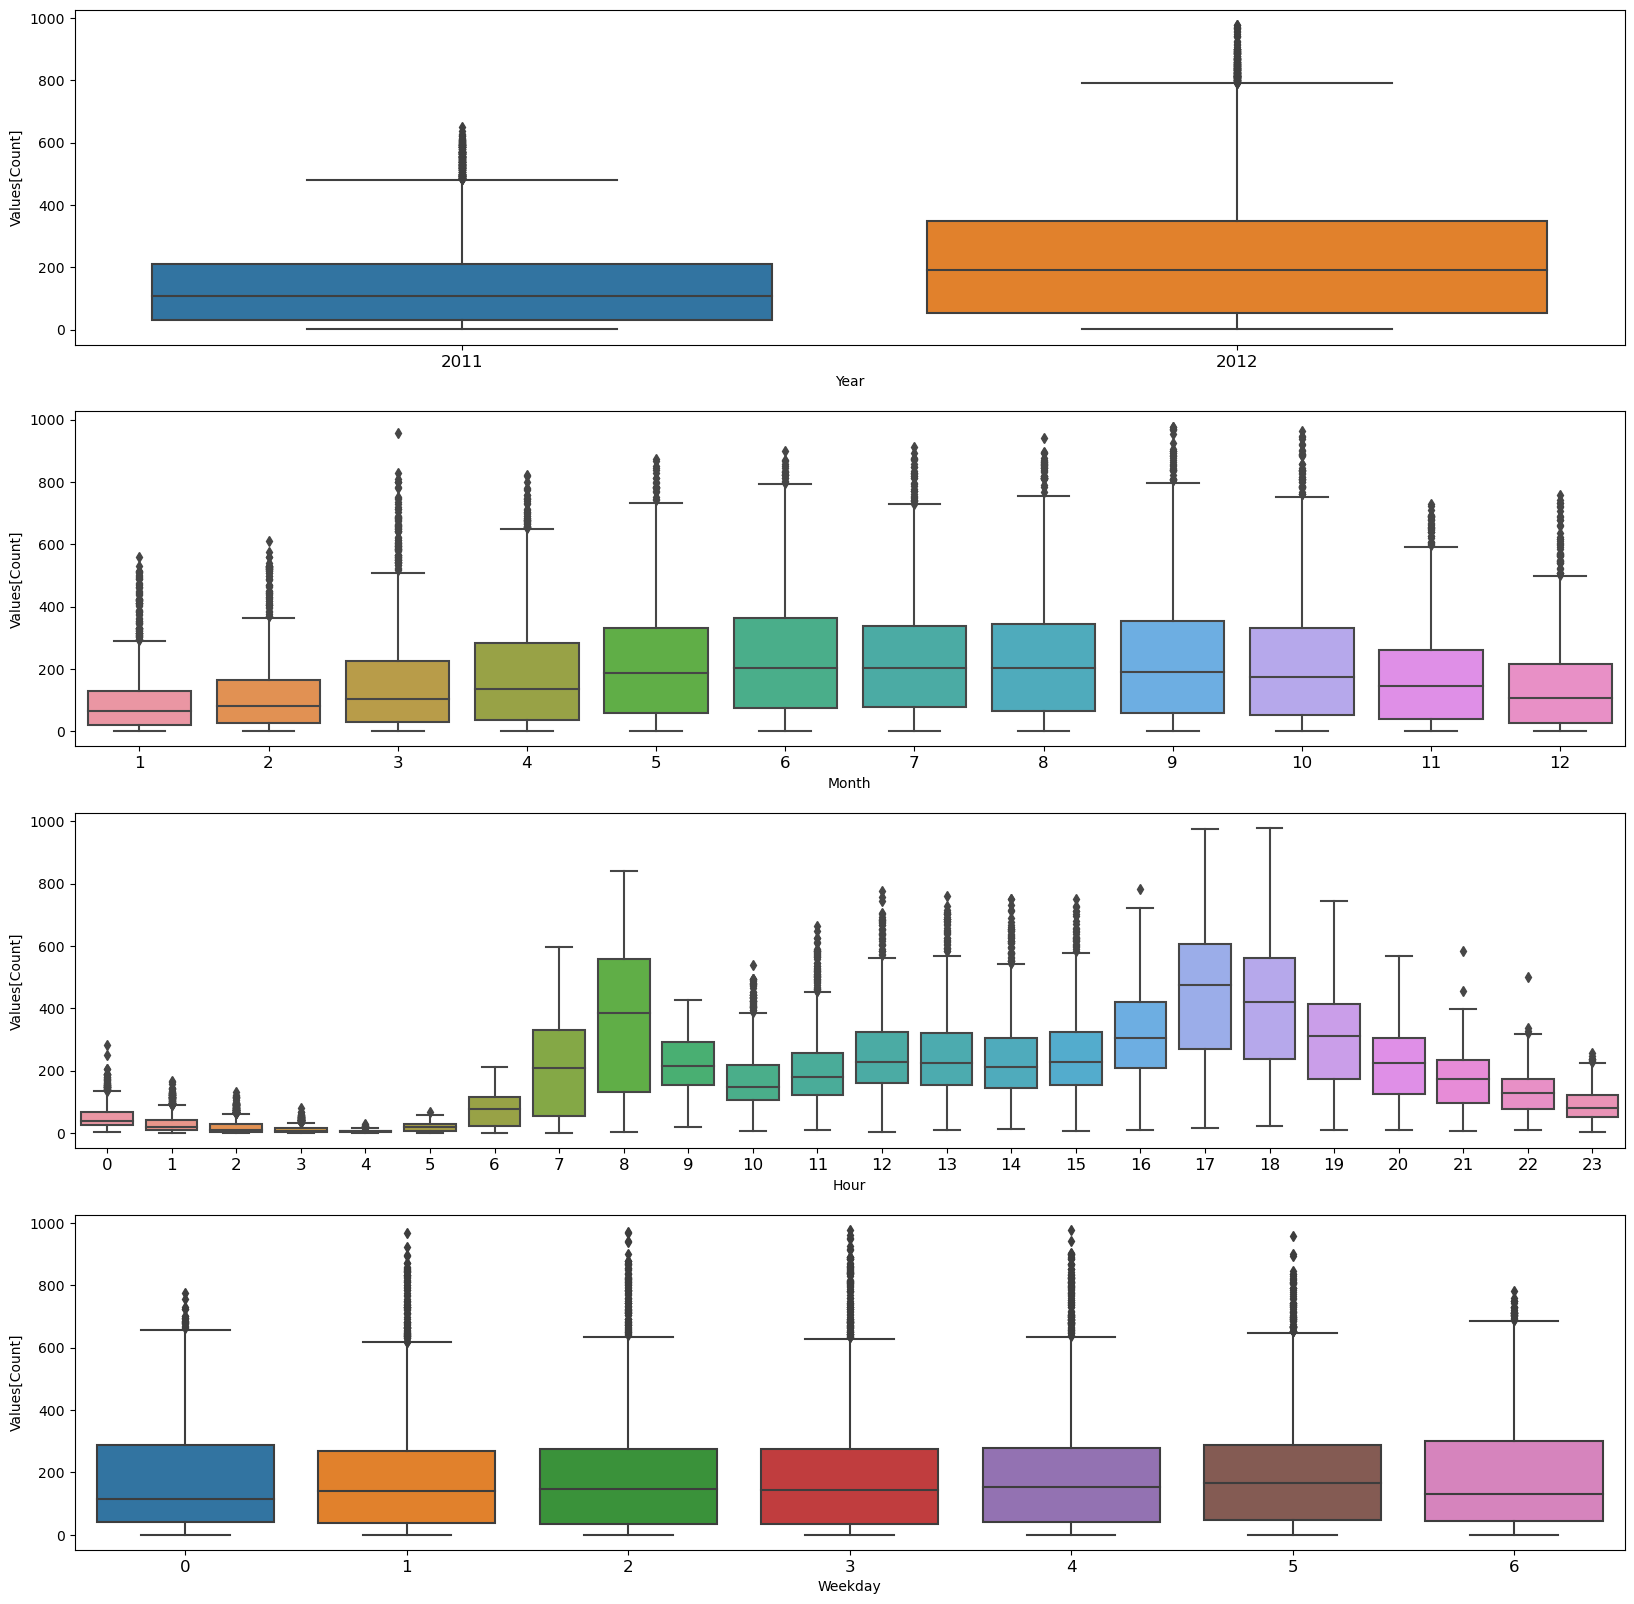

In [43]:
fig, axes = plt.subplots(nrows=4, ncols=1)
fig.set_size_inches(20, 20) 

sns.boxplot(data=df, y='cnt', x='yr', ax=axes[0])
sns.boxplot(data=df, y='cnt', x='mnth', ax=axes[1])
sns.boxplot(data=df, y='cnt', x='hr', ax=axes[2])
sns.boxplot(data=df, y='cnt', x='weekday', ax=axes[3])

axes[0].set(xlabel='Year', ylabel='Values[Count]')
axes[1].set(xlabel='Month', ylabel='Values[Count]')
axes[2].set(xlabel='Hour', ylabel='Values[Count]')
axes[3].set(xlabel='Weekday', ylabel='Values[Count]')

for ax in axes:
    ax.tick_params(axis='x', labelsize=12)

plt.show()

#### Box Plot for Numerical Features and Target Variable[cnt]

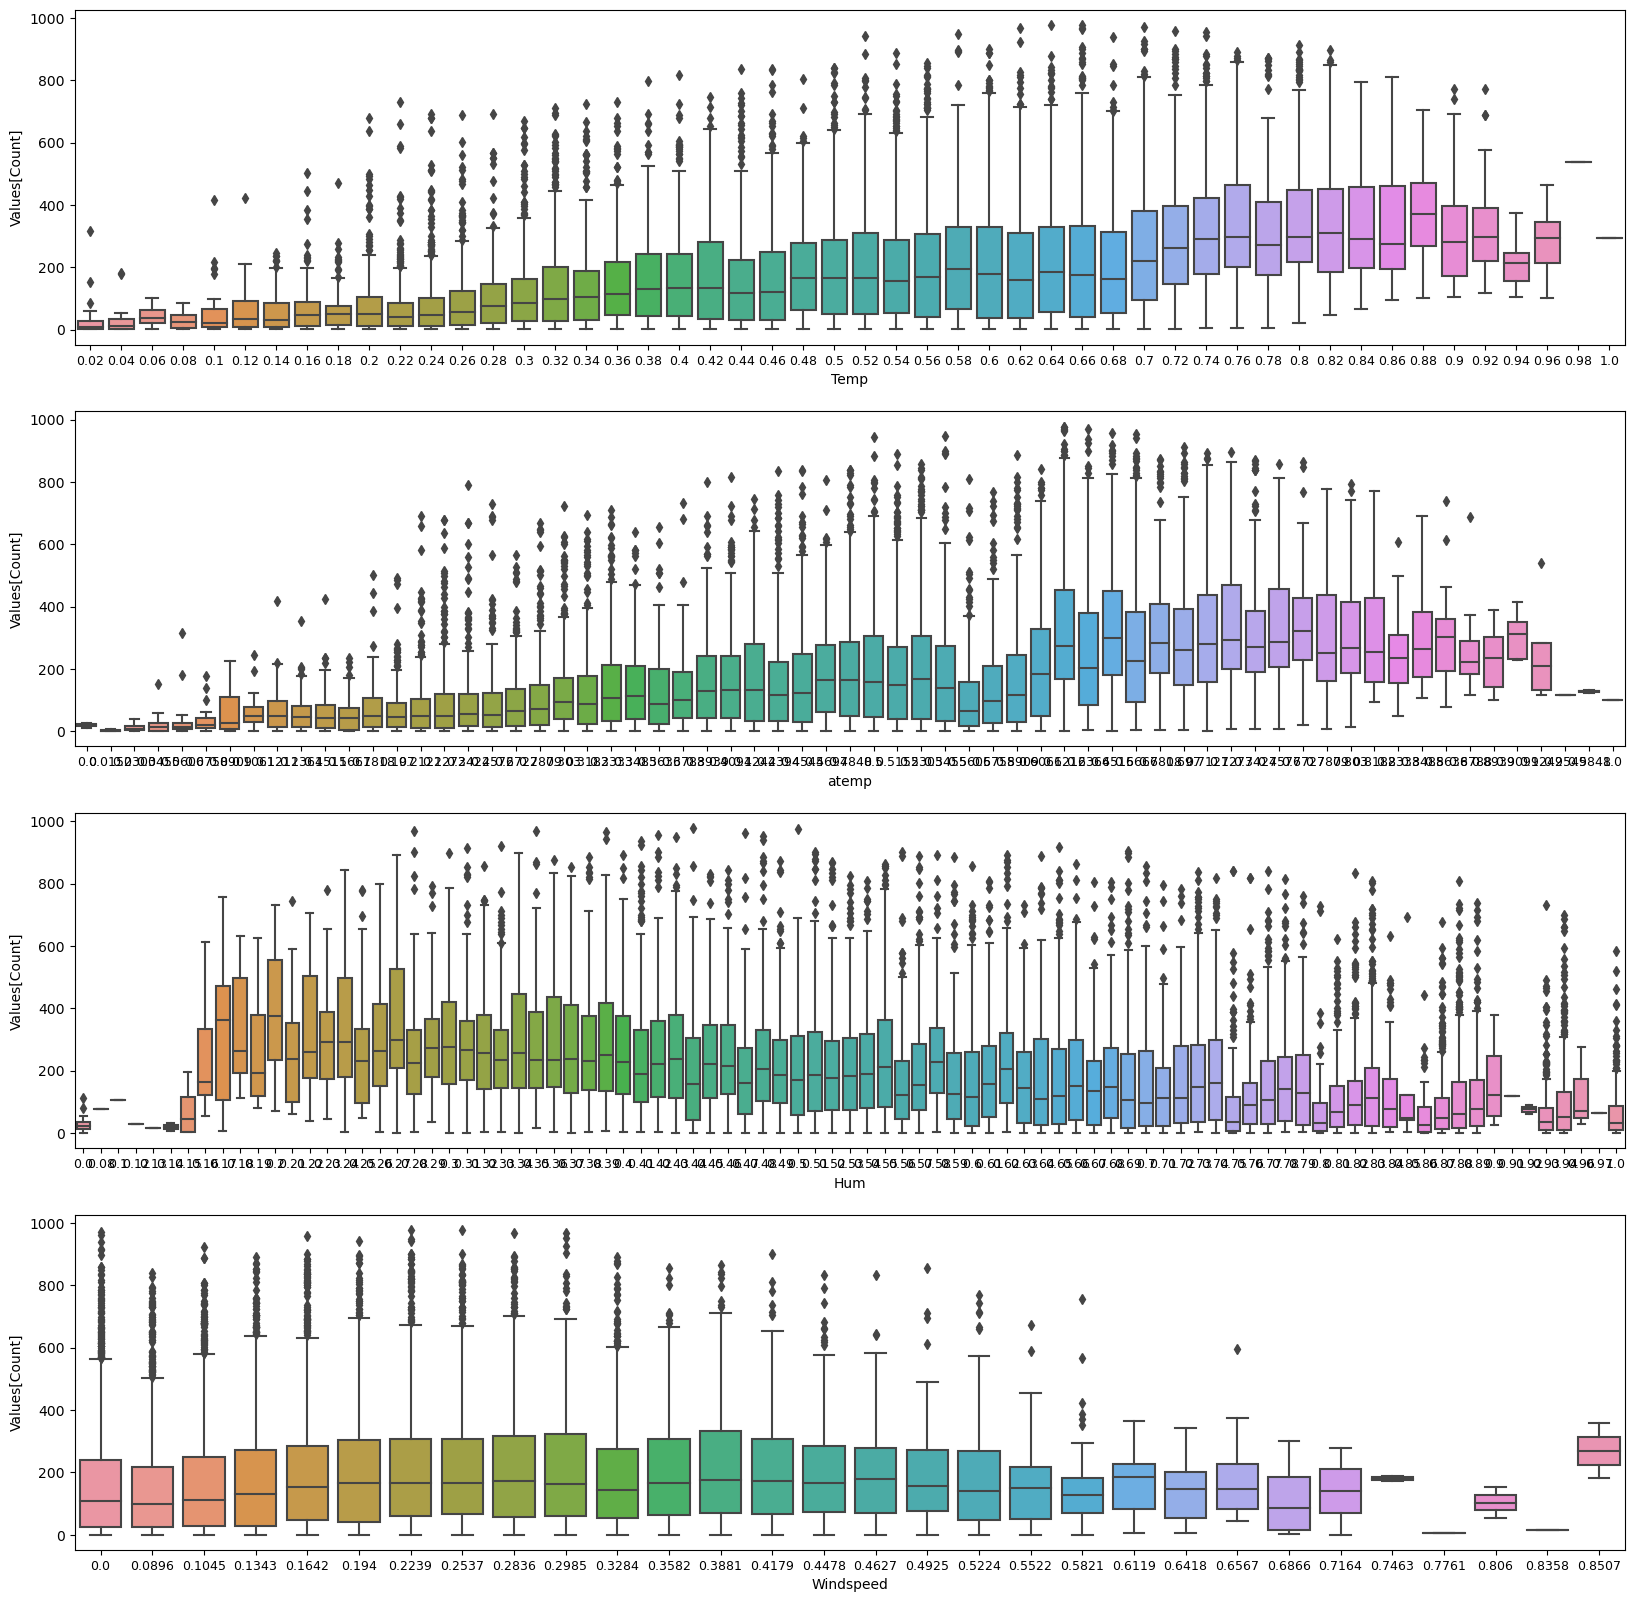

In [44]:
fig, axes = plt.subplots(nrows=4, ncols=1)
fig.set_size_inches(20, 20) 

sns.boxplot(data=df, y='cnt', x='temp', ax=axes[0])
sns.boxplot(data=df, y='cnt', x='atemp', ax=axes[1])
sns.boxplot(data=df, y='cnt', x='hum', ax=axes[2])
sns.boxplot(data=df, y='cnt', x='windspeed', ax=axes[3])

axes[0].set(xlabel='Temp', ylabel='Values[Count]')
axes[1].set(xlabel='atemp', ylabel='Values[Count]')
axes[2].set(xlabel='Hum', ylabel='Values[Count]')
axes[3].set(xlabel='Windspeed', ylabel='Values[Count]')

for ax in axes:
    ax.tick_params(axis='x', labelsize=9)

plt.show()

In [45]:
df1= df.copy()
df1.drop(columns=['dteday', 'casual', 'registered','tempbin','humbin','windbin'], inplace=True)

In [46]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [47]:
le = preprocessing.LabelEncoder()

In [48]:
df1['season']= le.fit_transform(df1['season'])
df1['holiday']= le.fit_transform(df1['holiday'])
df1['workingday']= le.fit_transform(df1['workingday'])
df1['weathersit']= le.fit_transform(df1['weathersit'])

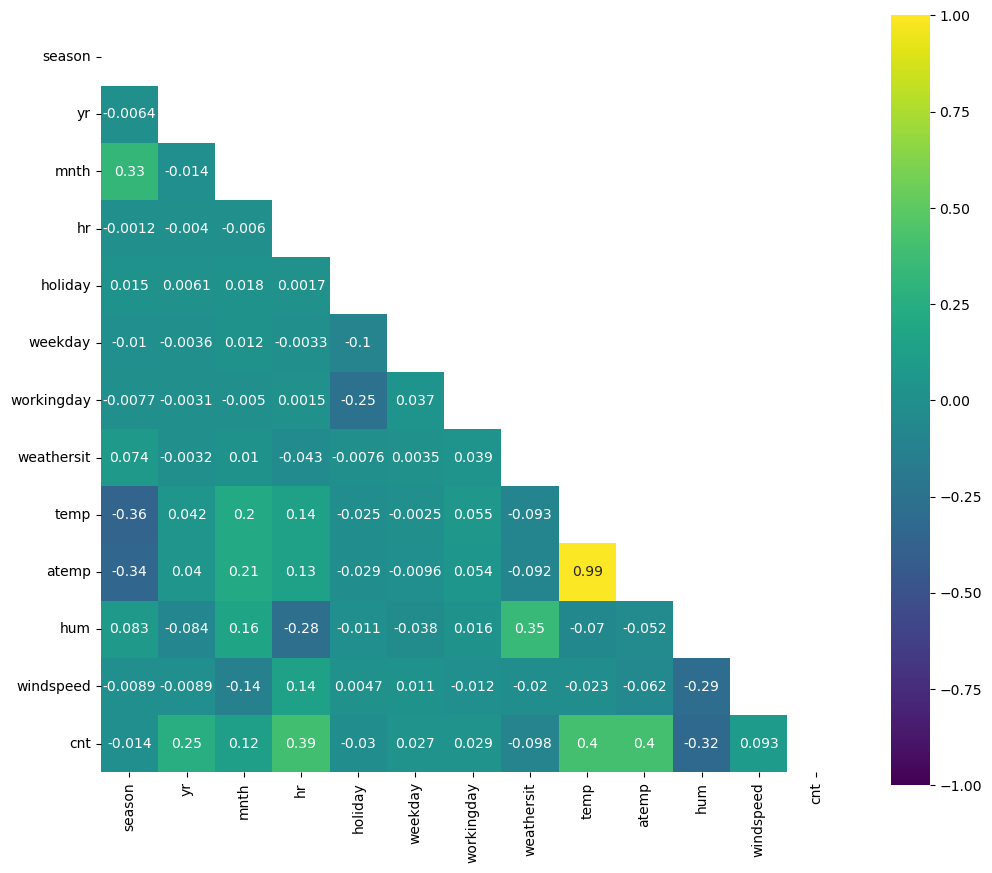

In [49]:
corr = df1.corr('pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(12,10))
sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, cmap='viridis', annot=True, square=True)
plt.show()

There is high correlation between 'temp' and 'atemp'. 'hr' and 'temp' have good correlation with target variable 'cnt' as compared to other features.

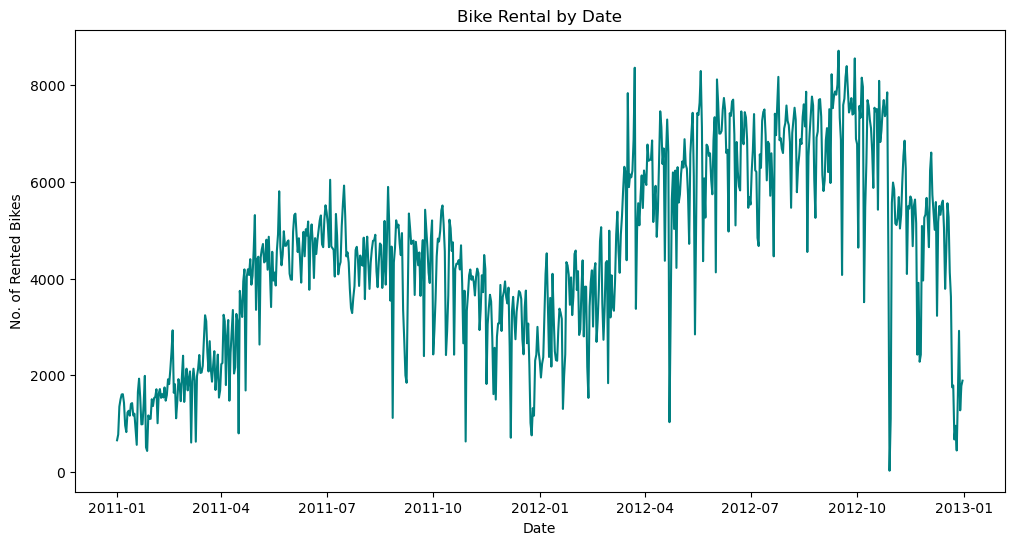

In [50]:
DATE = df.groupby('dteday')['cnt'].sum()

plt.figure(figsize=(12,6))
plt.plot(DATE.index, DATE.values, color='teal')
plt.xlabel('Date')
plt.ylabel('No. of Rented Bikes')
plt.title('Bike Rental by Date')

plt.show()

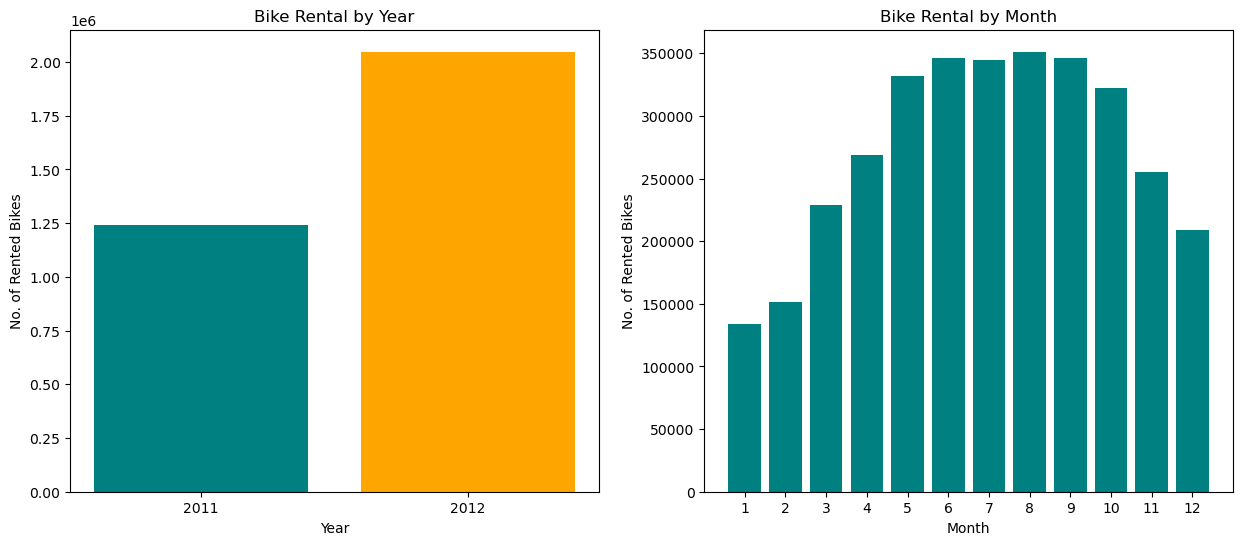

In [51]:
Year = df.groupby('yr')['cnt'].sum()
Month = df.groupby('mnth')['cnt'].sum()


fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plotting for Year
axes[0].bar(Year.index, Year.values, color=['teal', 'orange'])
axes[0].set_xlabel('Year')
axes[0].set_ylabel('No. of Rented Bikes')
axes[0].set_title('Bike Rental by Year')
axes[0].set_xticks(Year.index)

# Plotting for Month
axes[1].bar(Month.index, Month.values, color='teal')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('No. of Rented Bikes')
axes[1].set_title('Bike Rental by Month')
axes[1].set_xticks(Month.index)

plt.show()

There is an increase in number of bikes rented from Year 2011 to 2012. For Monthwise Plot, January has minimum number of bikes rented and August has Maximum.

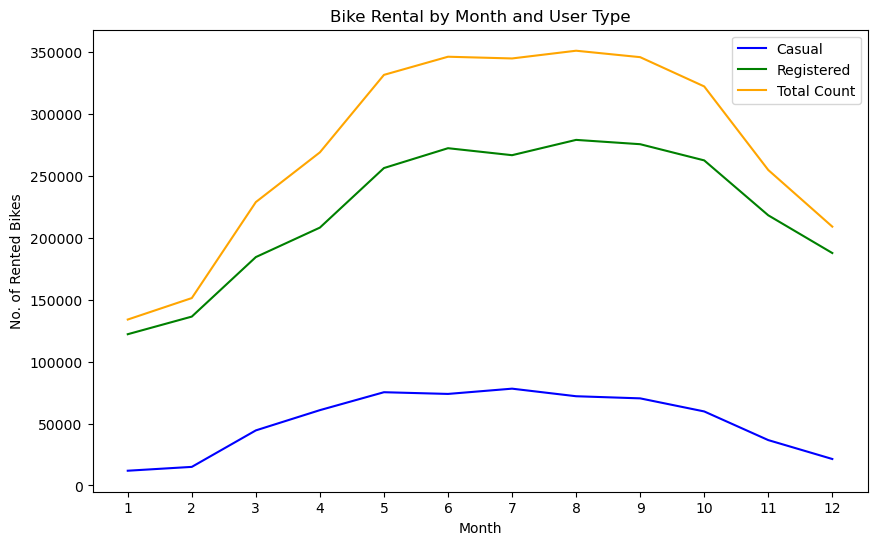

In [52]:
Month = df.groupby('mnth').agg({'casual': 'sum', 'registered': 'sum', 'cnt': 'sum'})

# Plotting for Month
plt.figure(figsize=(10, 6))
plt.plot(Month.index, Month['casual'], label='Casual', color='blue')
plt.plot(Month.index, Month['registered'], label='Registered', color='green')
plt.plot(Month.index, Month['cnt'], label='Total Count', color='orange')

# Adding labels and Title
plt.xlabel('Month')
plt.ylabel('No. of Rented Bikes')
plt.title('Bike Rental by Month and User Type')
plt.xticks(Month.index)
plt.legend()

plt.show()

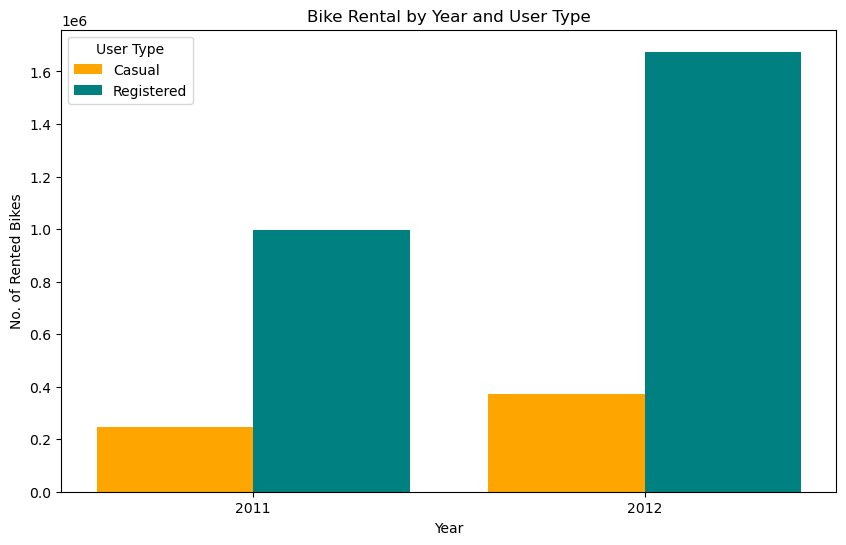

In [53]:
Year_user = df.groupby('yr').agg({'casual': 'sum', 'registered': 'sum'})

plt.figure(figsize=(10, 6))
plt.bar(Year_user.index - 0.2, Year_user['casual'], width=0.4, color='orange', label='Casual')
plt.bar(Year_user.index + 0.2, Year_user['registered'], width=0.4, color='teal', label='Registered')

plt.xlabel('Year')
plt.ylabel('No. of Rented Bikes')
plt.title('Bike Rental by Year and User Type')
plt.xticks(Year_user.index)
plt.legend(title='User Type')
plt.show()

There is increase in both Casual and Registered users from year 2011 to 2012 . The increase in Registered user type far exceeds than casual type.

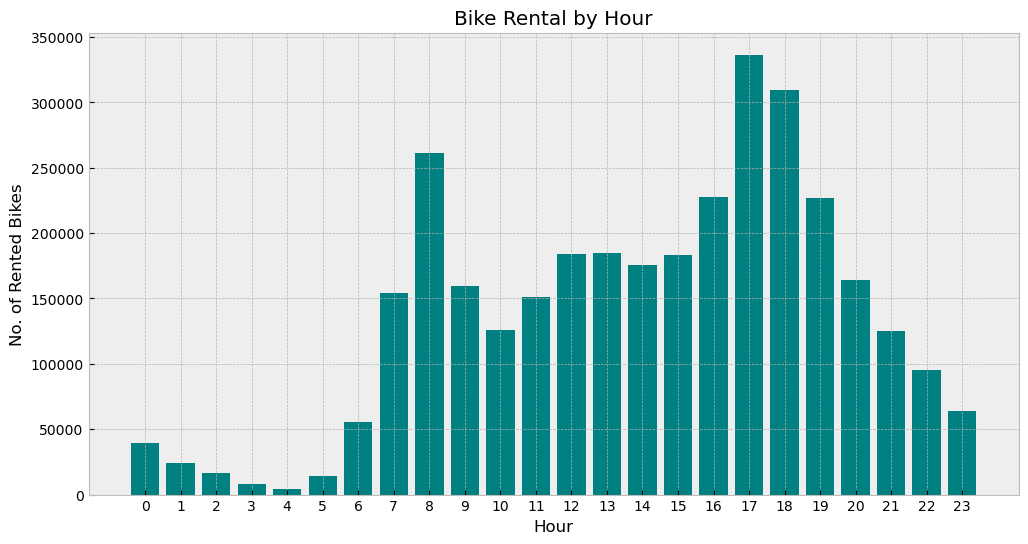

In [54]:
Hour= df.groupby('hr')['cnt'].sum()

plt.style.use('bmh')
plt.figure(figsize=(12,6))
plt.bar(Hour.index, Hour.values, color='teal')
plt.xlabel('Hour')
plt.ylabel('No. of Rented Bikes')
plt.title('Bike Rental by Hour')
plt.xticks(Hour.index)
plt.show()

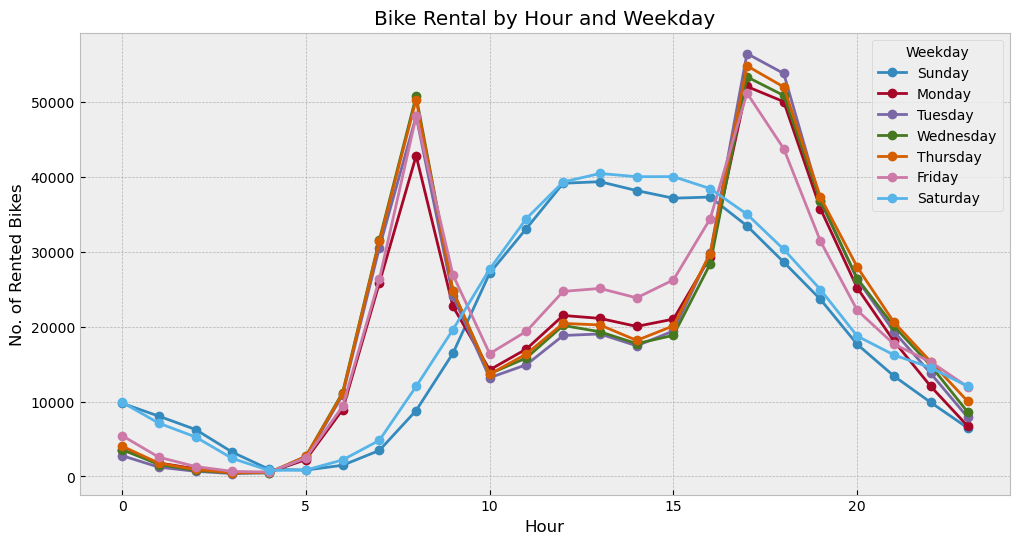

In [55]:
Hour_weekday = df.groupby(['hr', 'weekday']).agg({'cnt': 'sum'}).reset_index()

weekday_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 
                   5: 'Friday', 6: 'Saturday'}

plt.figure(figsize=(12, 6))
for day in Hour_weekday['weekday'].unique():
    day_name = weekday_mapping[day] 
    day_data = Hour_weekday[Hour_weekday['weekday'] == day]
    plt.plot(day_data['hr'], day_data['cnt'], label=day_name, marker='o')

plt.xlabel('Hour')
plt.ylabel('No. of Rented Bikes')
plt.title('Bike Rental by Hour and Weekday')
plt.legend(title='Weekday')
plt.grid(True)
plt.show()

During the weekdays there is increase in no. of bikes rented at Morning[7 to 9 AM] and at Evening[5 to 7 PM]. In weekends there in increase in no. of bikes rented at Midday. 

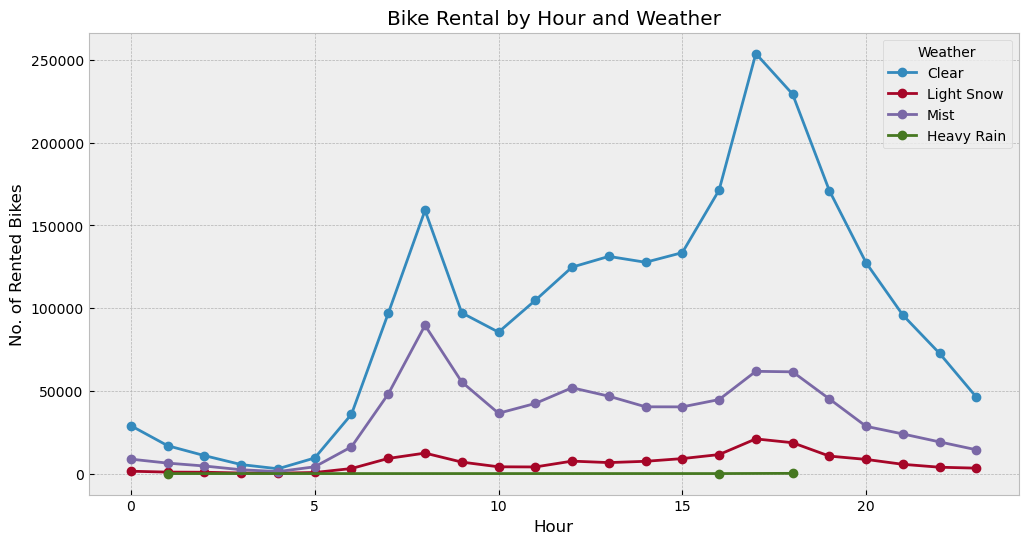

In [56]:
Hour_weathersit = df.groupby(['hr', 'weathersit']).agg({'cnt': 'sum'}).reset_index()

plt.figure(figsize=(12, 6))
for weather in Hour_weathersit['weathersit'].unique():
    weather_data = Hour_weathersit[Hour_weathersit['weathersit'] == weather]
    plt.plot(weather_data['hr'], weather_data['cnt'], label=weather, marker='o')

plt.xlabel('Hour')
plt.ylabel('No. of Rented Bikes')
plt.title('Bike Rental by Hour and Weather')
plt.legend(title='Weather')
plt.grid(True)
plt.show()

Maximum no. of bikes are Rented During Clear Weather, followed by Mist, Light Snow and Heavy Rain.

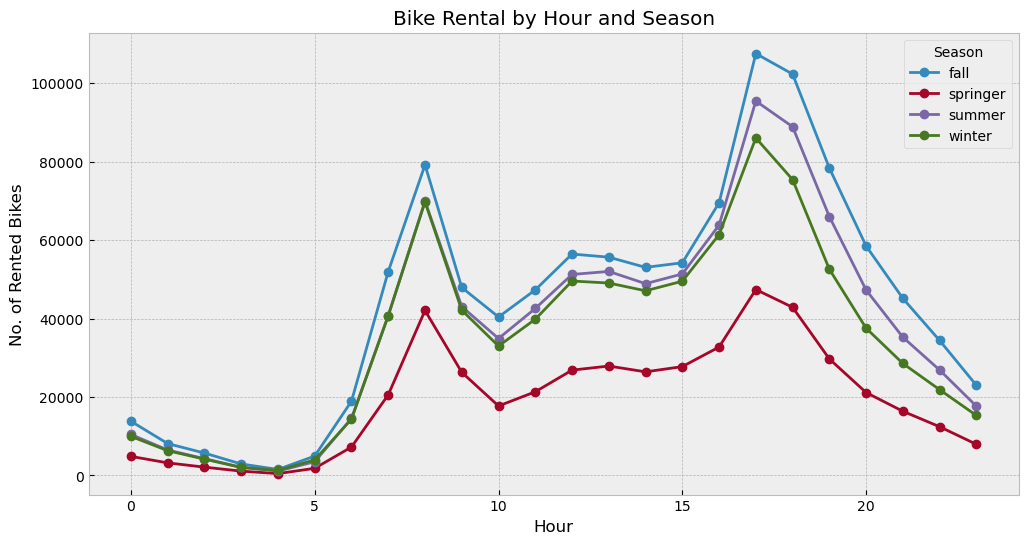

In [57]:
Hour_season = df.groupby(['hr', 'season']).agg({'cnt': 'sum'}).reset_index()

plt.figure(figsize=(12, 6))
for season in Hour_season['season'].unique():
    season_data = Hour_season[Hour_season['season'] == season]
    plt.plot(season_data['hr'], season_data['cnt'], label=season, marker='o')

plt.xlabel('Hour')
plt.ylabel('No. of Rented Bikes')
plt.title('Bike Rental by Hour and Season')
plt.legend(title='Season')
plt.grid(True)
plt.show()

Fall season saw maximum no. of bike rentals followed by Summer, Winter and Spring.

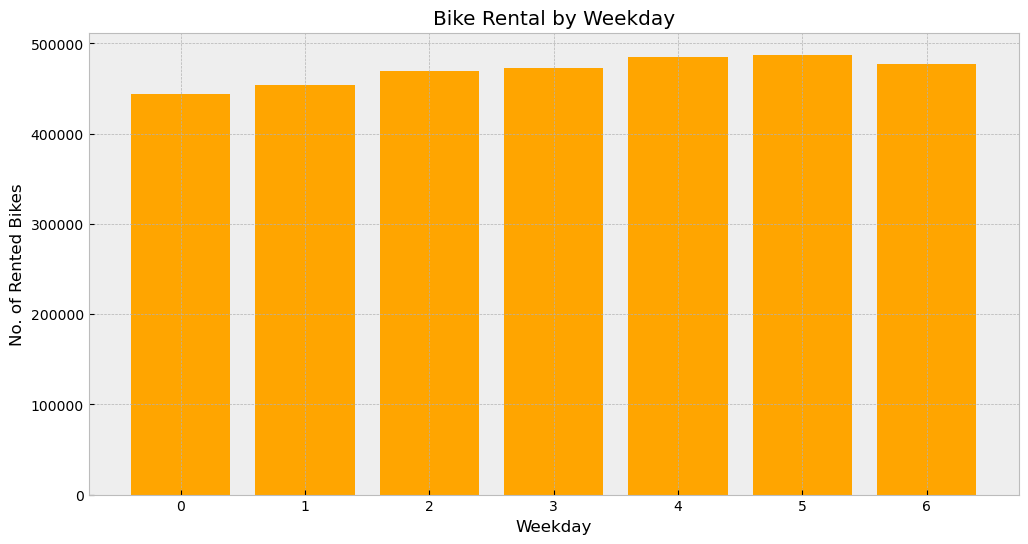

In [58]:
Weekday= df.groupby('weekday')['cnt'].sum()

plt.figure(figsize=(12,6))
plt.bar(Weekday.index, Weekday.values, color='orange')
plt.xlabel('Weekday')
plt.ylabel('No. of Rented Bikes')
plt.title('Bike Rental by Weekday')
plt.xticks(Weekday.index)
plt.show()

The number of bikes rented during weekdays does not show much variation.

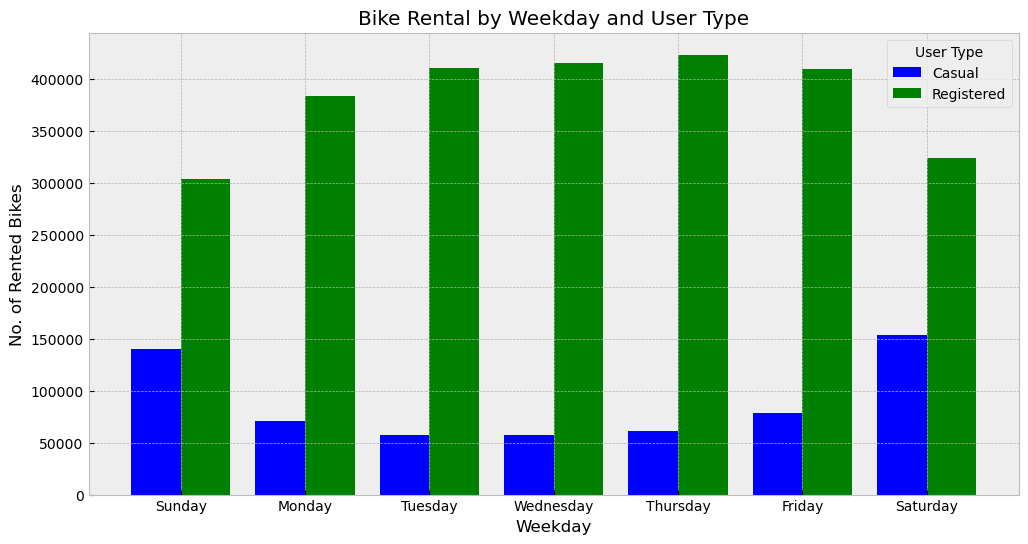

In [59]:
Weekday = df.groupby('weekday').agg({'casual': 'sum', 'registered': 'sum'}).reset_index()

plt.figure(figsize=(12, 6))
plt.bar(Weekday['weekday'] - 0.2, Weekday['casual'], width=0.4, color='blue', label='Casual')
plt.bar(Weekday['weekday'] + 0.2, Weekday['registered'], width=0.4, color='green', label='Registered')

plt.xlabel('Weekday')
plt.ylabel('No. of Rented Bikes')
plt.title('Bike Rental by Weekday and User Type')
plt.xticks(Weekday['weekday'], ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 
                                'Friday', 'Saturday'])
plt.legend(title='User Type')
plt.show()

The no. of Casual user type increase and Registered user type decrease on weekends . 

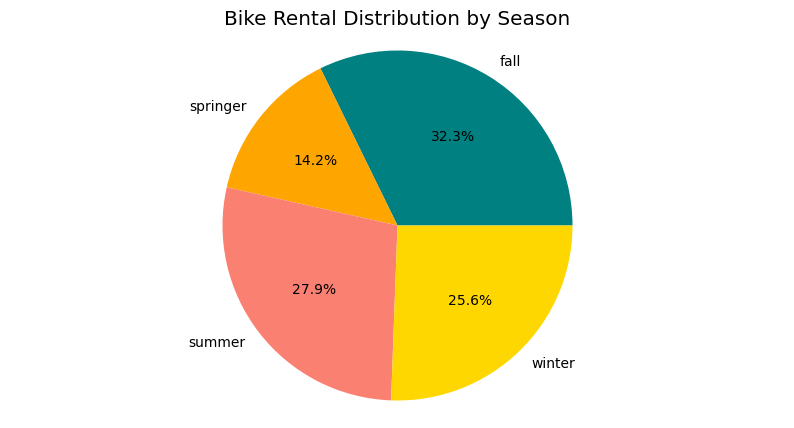

In [60]:
Season = df.groupby('season')['cnt'].sum()

plt.figure(figsize=(10,5))
plt.pie(Season, labels=Season.index, autopct='%1.1f%%',colors=['teal','orange','salmon','gold'])
plt.title('Bike Rental Distribution by Season')
plt.axis('equal')
plt.show()

In Fall season maximum number of bikes were rented, followed by Summer, Winter and minimum in spring.

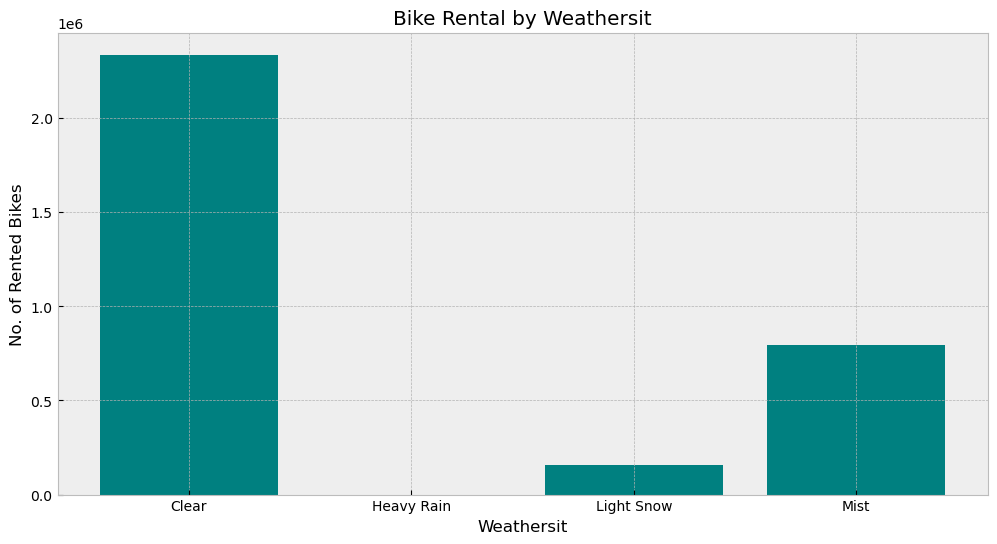

In [61]:
Weathersit= df.groupby('weathersit')['cnt'].sum()

plt.figure(figsize=(12,6))
plt.bar(Weathersit.index, Weathersit.values, color='teal')
plt.xlabel('Weathersit')
plt.ylabel('No. of Rented Bikes')
plt.title('Bike Rental by Weathersit')
plt.xticks(Weathersit.index)
plt.show()

According to weather situation , maximum bikes were rented when the weather is Clear, followed by Mist and Light Snow.

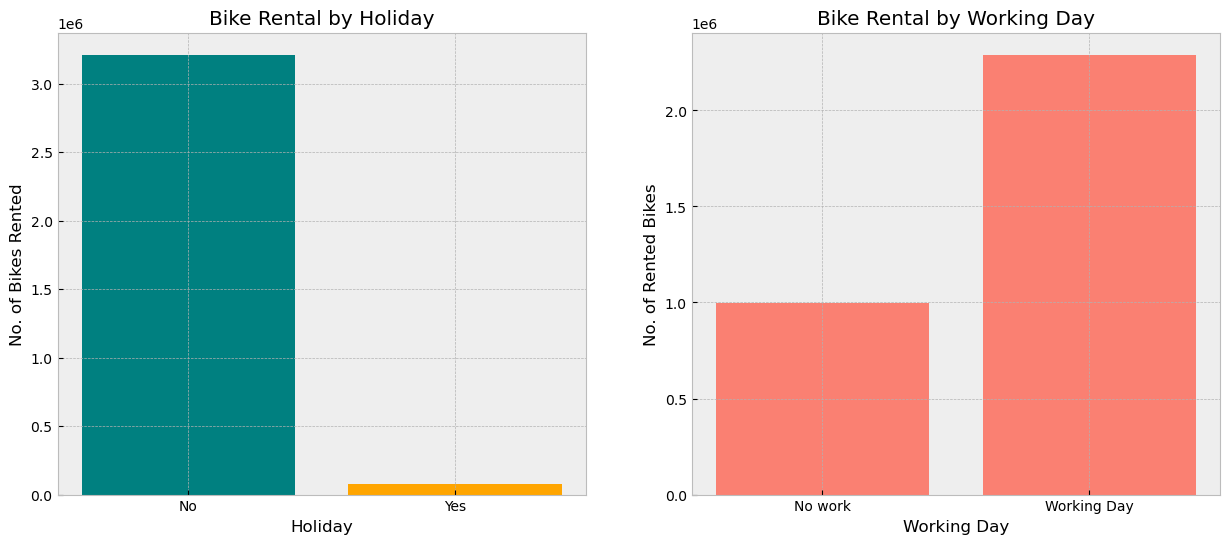

In [62]:
Holiday = df.groupby('holiday')['cnt'].sum()
WorkingDay = df.groupby('workingday')['cnt'].sum()

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plotting for Holiday
axes[0].bar(Holiday.index, Holiday.values, color=['teal', 'orange'])
axes[0].set_xlabel('Holiday')
axes[0].set_ylabel('No. of Bikes Rented')
axes[0].set_title('Bike Rental by Holiday')
axes[0].set_xticks(Holiday.index)

# Plotting for Working Day
axes[1].bar(WorkingDay.index, WorkingDay.values, color='salmon')
axes[1].set_xlabel('Working Day')
axes[1].set_ylabel('No. of Rented Bikes')
axes[1].set_title('Bike Rental by Working Day')
axes[1].set_xticks(WorkingDay.index)

plt.show()

The number of bikes rented on non-holidays is far greater than on holiday. Similarly, there is a great difference between number of bikes rented working day to non-working day.

### Feature Engineering
#### 1. Treating Outliers

In [63]:
df.sample(1)

dteday season    yr  mnth  hr holiday  weekday   workingday  \
4539 2011-07-13   fall  2011     7   1      No        3  Working Day   

     weathersit  temp  atemp   hum  windspeed  casual  registered  cnt  \
4539      Clear  0.76  0.697  0.55        0.0       1          11   12   

        tempbin     humbin    windbin  
4539  0.6 - 0.8  0.4 - 0.6  0.0 - 0.2

In [64]:
df.drop(['dteday', 'casual', 'registered', 'tempbin', 'humbin', 'windbin'], axis=1, inplace=True)

In [65]:
numerical_features = []
categorical_features = []

for col in df.columns:  
    if df[col].nunique() > 25:
        numerical_features.append(col) 
    else:
        categorical_features.append(col)
        
        
    if 'cnt' in numerical_features:
        numerical_features.remove('cnt')

In [66]:
numerical_features

['temp', 'atemp', 'hum', 'windspeed']

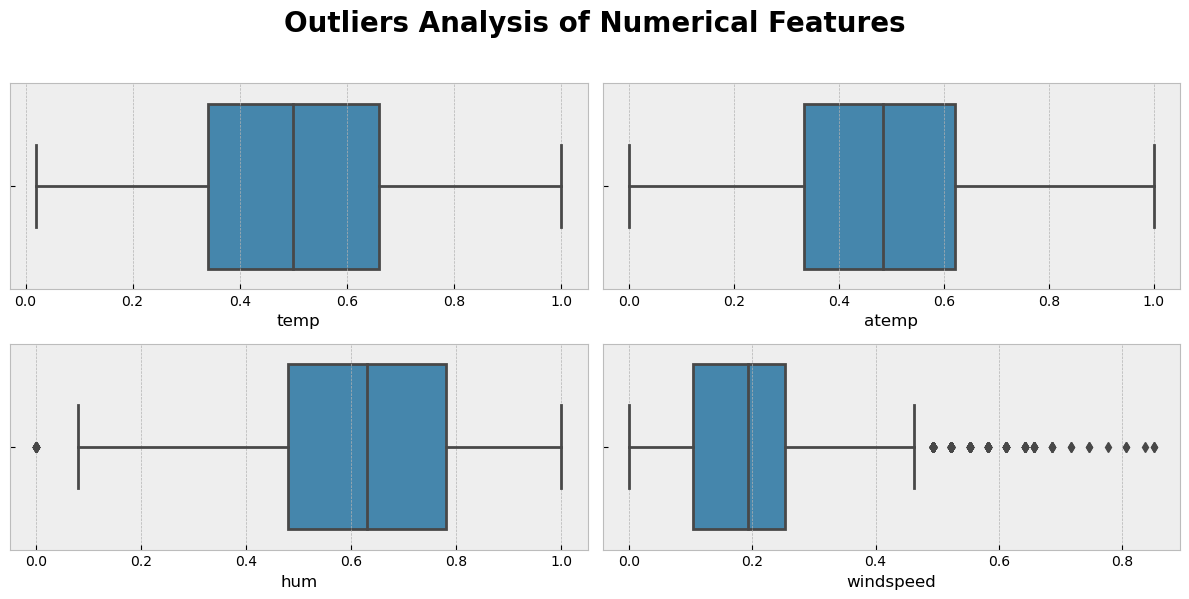

In [67]:
plt.figure(figsize=(12, 8))
plt.suptitle('Outliers Analysis of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i, col in enumerate(numerical_features):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=df[col])
    plt.xlabel(col)

plt.tight_layout()
plt.show()

Outliers are visible in the Windspeed and Humidity columns.

In [68]:
def clip_outliers(df):
    for col in df[numerical_features]:
        # Using IQR method to define range of Upper and Lower limit.
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        # Replace the outliers with Upper and lower Bound
        df[col] = df[col].clip(lower_bound, upper_bound)
    return df

In [69]:
df = clip_outliers(df)

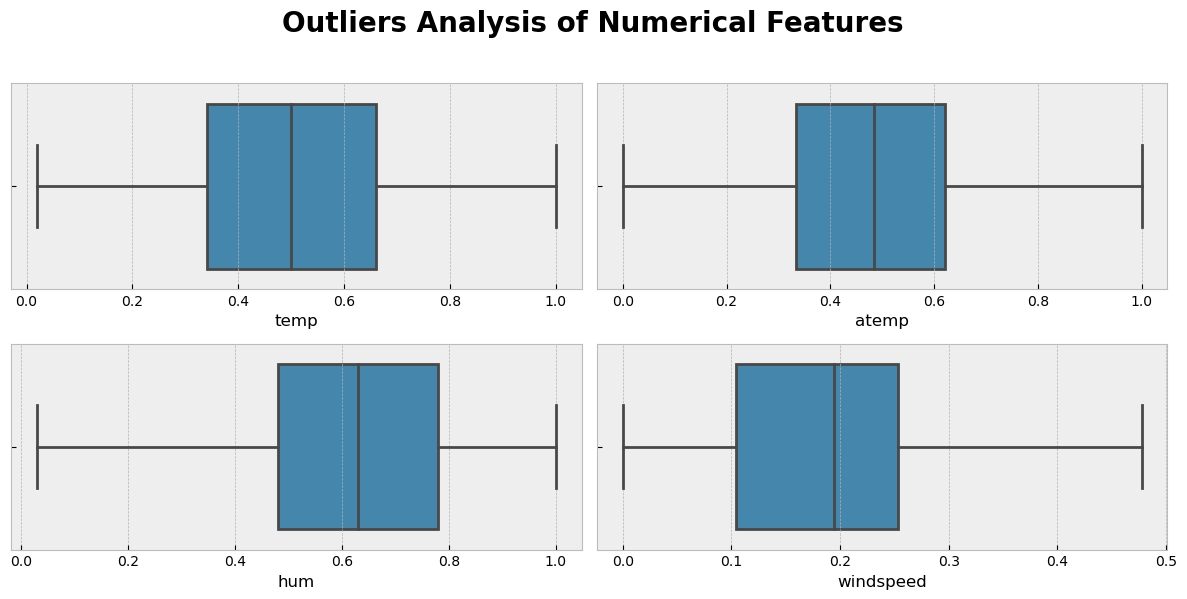

In [70]:
plt.figure(figsize=(12, 8))
plt.suptitle('Outliers Analysis of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i, col in enumerate(numerical_features):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=df[col])
    plt.xlabel(col)

plt.tight_layout()
plt.show()

#### 2. Encoding Categorical Values

In [71]:
df.sample(1)

season    yr  mnth  hr holiday  weekday workingday weathersit  temp  \
15984  winter  2012    11  17      No        6    No work       Mist  0.36   

        atemp   hum  windspeed  cnt  
15984  0.3333  0.46     0.2985  410

In [72]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [73]:
le = preprocessing.LabelEncoder()

In [74]:
df['season']= le.fit_transform(df['season'])
df['holiday']= le.fit_transform(df['holiday'])
df['workingday']= le.fit_transform(df['workingday'])
df['weathersit']= le.fit_transform(df['weathersit'])

#### 3. Correlation Coefficient

In [75]:
# Find and Remove Correlated Features
def correlation(dataset, threshold):
    col_corr = set()    
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:     
                colname = corr_matrix.columns[i]               
                col_corr.add(colname)
    return col_corr

In [76]:
# Checking the Highly Correlated Features
correlation(df, 0.7) 

{'atemp'}

Since atemp and temp have a correlation coefficient of 0.98 and atemp is correlated to our target variable equally as temp, hence dropping atemp.

In [77]:
df.drop('atemp', axis=1, inplace=True)

#### 3. VIF (Variance Inflation Factor)

In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

  # For each X, calculate VIF 
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["features"] = X.columns
    
    return vif

In [79]:
calc_vif(df[[i for i in df.describe().columns]])

VIF Factor    features
0     4.044596      season
1    41.505333          yr
2     6.260101        mnth
3     4.657992          hr
4     1.110661     holiday
5     3.290282     weekday
6     3.386234  workingday
7     1.744930  weathersit
8    12.424895        temp
9    16.929730         hum
10    3.961407   windspeed
11    3.208005         cnt

Since the VIF factor of 'yr' is large hence , remove the year to build the model.

In [80]:
df.drop('yr', axis=1, inplace=True)

In [81]:
df

season  mnth  hr  holiday  weekday  workingday  weathersit  temp   hum  \
0           1     1   0        0        6           0           0  0.24  0.81   
1           1     1   1        0        6           0           0  0.22  0.80   
3           1     1   3        0        6           0           0  0.24  0.75   
4           1     1   4        0        6           0           0  0.24  0.75   
5           1     1   5        0        6           0           3  0.24  0.75   
...       ...   ...  ..      ...      ...         ...         ...   ...   ...   
17370       1    12  15        0        1           1           3  0.28  0.45   
17373       1    12  18        0        1           1           3  0.26  0.48   
17374       1    12  19        0        1           1           3  0.26  0.60   
17375       1    12  20        0        1           1           3  0.26  0.60   
17377       1    12  22        0        1           1           0  0.26  0.56   

       windspeed  cnt  
0         0.0000   16  
1         0.0000   40  
3         0.0000   13  
4         0.0000    1  
5         0.0896    1  
...          ...  ...  
17370     0.1343  315  
17373     0.1343  122  
17374     0.1642  119  
17375     0.1642   89  
17377     0.1343   61  

[17339 rows x 11 columns]

####  4. Normalization of Target Variable

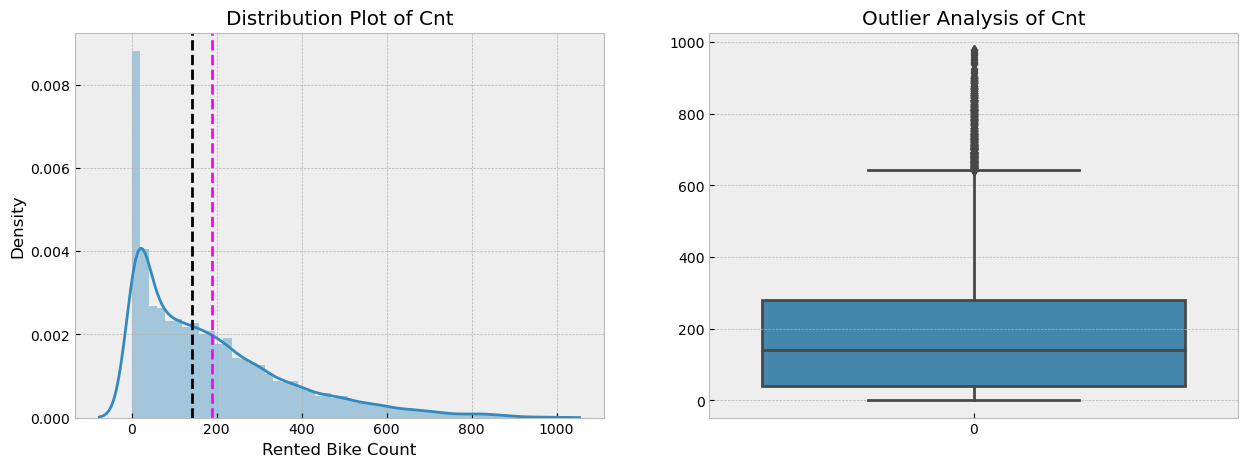

In [82]:
fig, ax = plt.subplots(1,2 , figsize = (15,5))

# Distribution plot of Rented Bike Count
dist =sns.distplot(df['cnt'],hist=True, ax = ax[0])
dist.set(xlabel = 'Rented Bike Count', ylabel ='Density', title = 'Distribution Plot of Cnt')

dist.axvline(df['cnt'].mean(), color='magenta', linestyle='dashed', linewidth=2)
dist.axvline(df['cnt'].median(), color='black', linestyle='dashed', linewidth=2)

# Boxplot
box = sns.boxplot(df.cnt, ax= ax[1])
box.set(title = 'Outlier Analysis of Cnt')
plt.show()

<Axes: xlabel='cnt', ylabel='Density'>

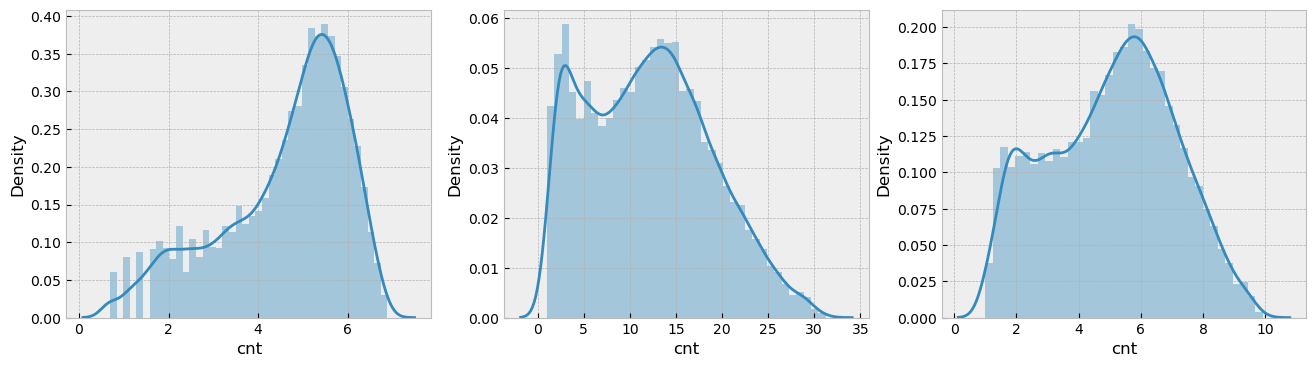

In [83]:
# Transformation for Target Variable
fig, axs = plt.subplots(1,3, figsize=(16,4))

sns.distplot(np.log1p(df['cnt']),kde=True, ax=axs[0])
sns.distplot(np.sqrt(df['cnt']),kde=True, ax=axs[1])
sns.distplot(np.cbrt(df['cnt']),kde=True, ax=axs[2])

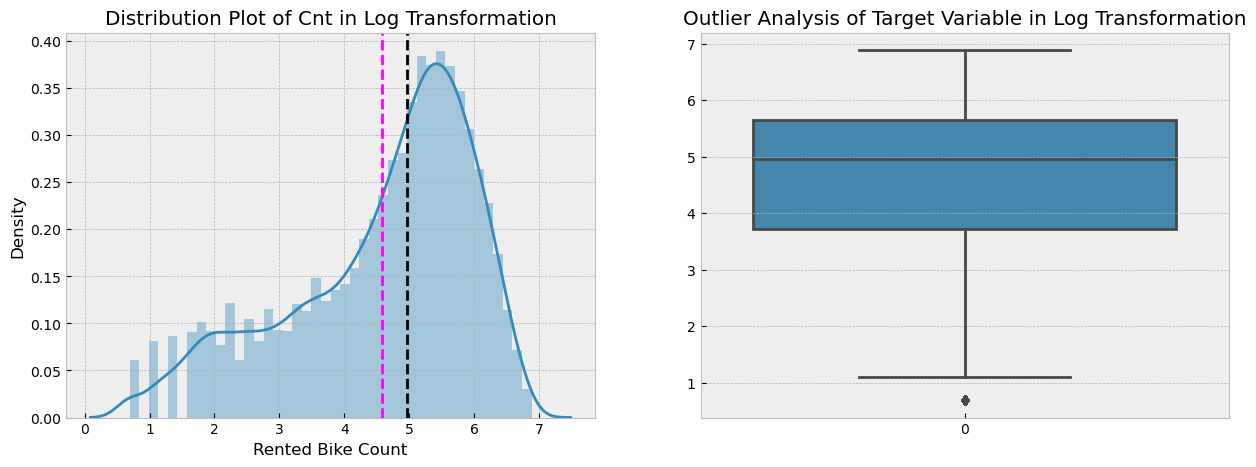

In [84]:
fig, ax = plt.subplots(1,2 , figsize = (15,5))

#  log Transformation in Our Target Variable
dist =sns.distplot(np.log1p(df['cnt']), ax = ax[0])
dist.set(xlabel = 'Rented Bike Count', ylabel ='Density', title = 'Distribution Plot of Cnt in Log Transformation')

dist.axvline(np.log1p(df['cnt']).mean(), color='magenta', linestyle='dashed', linewidth=2)
dist.axvline(np.log1p(df['cnt']).median(), color='black', linestyle='dashed', linewidth=2)

# Boxplot
box = sns.boxplot(np.log1p(df.cnt), ax= ax[1])
box.set(title = 'Outlier Analysis of Target Variable in Log Transformation')
plt.show()

In [85]:
df['cnt']= np.log1p(df['cnt']) # Applying Log Transformation in the Target Variable.

#### Train Test Split

In [86]:
X = df.drop('cnt', axis=1)
y= df['cnt'] 

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

(13871, 10)
(3468, 10)


In [89]:
from sklearn.preprocessing import StandardScaler

In [90]:
# Scaling Data
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [91]:
from sklearn.metrics import mean_squared_error, r2_score

In [92]:
df

season  mnth  hr  holiday  weekday  workingday  weathersit  temp   hum  \
0           1     1   0        0        6           0           0  0.24  0.81   
1           1     1   1        0        6           0           0  0.22  0.80   
3           1     1   3        0        6           0           0  0.24  0.75   
4           1     1   4        0        6           0           0  0.24  0.75   
5           1     1   5        0        6           0           3  0.24  0.75   
...       ...   ...  ..      ...      ...         ...         ...   ...   ...   
17370       1    12  15        0        1           1           3  0.28  0.45   
17373       1    12  18        0        1           1           3  0.26  0.48   
17374       1    12  19        0        1           1           3  0.26  0.60   
17375       1    12  20        0        1           1           3  0.26  0.60   
17377       1    12  22        0        1           1           0  0.26  0.56   

       windspeed       cnt  
0         0.0000  2.833213  
1         0.0000  3.713572  
3         0.0000  2.639057  
4         0.0000  0.693147  
5         0.0896  0.693147  
...          ...       ...  
17370     0.1343  5.755742  
17373     0.1343  4.812184  
17374     0.1642  4.787492  
17375     0.1642  4.499810  
17377     0.1343  4.127134  

[17339 rows x 11 columns]

In [93]:
X

season  mnth  hr  holiday  weekday  workingday  weathersit  temp   hum  \
0           1     1   0        0        6           0           0  0.24  0.81   
1           1     1   1        0        6           0           0  0.22  0.80   
3           1     1   3        0        6           0           0  0.24  0.75   
4           1     1   4        0        6           0           0  0.24  0.75   
5           1     1   5        0        6           0           3  0.24  0.75   
...       ...   ...  ..      ...      ...         ...         ...   ...   ...   
17370       1    12  15        0        1           1           3  0.28  0.45   
17373       1    12  18        0        1           1           3  0.26  0.48   
17374       1    12  19        0        1           1           3  0.26  0.60   
17375       1    12  20        0        1           1           3  0.26  0.60   
17377       1    12  22        0        1           1           0  0.26  0.56   

       windspeed  
0         0.0000  
1         0.0000  
3         0.0000  
4         0.0000  
5         0.0896  
...          ...  
17370     0.1343  
17373     0.1343  
17374     0.1642  
17375     0.1642  
17377     0.1343  

[17339 rows x 10 columns]

In [94]:
y

0        2.833213
1        3.713572
3        2.639057
4        0.693147
5        0.693147
           ...   
17370    5.755742
17373    4.812184
17374    4.787492
17375    4.499810
17377    4.127134
Name: cnt, Length: 17339, dtype: float64

## Model Building

In [95]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [169]:
# List for Appending Performance Metric Score
model_result = []

def predict(ml_model, model_name, X_train, X_test, y_train, y_test):
    # Fit the Model
    model = ml_model.fit(X_train, y_train)

    # Predicting Values
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    '''Evaluation Metrics on Train Data'''
    print('''Evaluation Metrics on Train Data''')
    train_MSE = round(mean_squared_error(y_train, y_train_pred), 3)
    train_RMSE = round(np.sqrt(train_MSE), 3)
    train_r2 = round(r2_score(y_train, y_train_pred), 3)

    print(f'train MSE : {train_MSE}')
    print(f'train RMSE : {train_RMSE}')
    print(f'train R2 : {train_r2}')

    '''Evaluation Metrics on Test Data'''
    print('''Evaluation Metrics on Test Data''')
    test_MSE = round(mean_squared_error(y_test, y_test_pred), 3)
    test_RMSE = round(np.sqrt(test_MSE), 3)
    test_r2 = round(r2_score(y_test, y_test_pred), 3)
    print(f'test MSE : {test_MSE}')
    print(f'test RMSE : {test_RMSE}')
    print(f'test R2 : {test_r2}')
    print('-'*100)

    # Graph --> Actual vs Predicted on Test Data
    plt.figure(figsize=(6, 5))
    plt.plot((y_test_pred)[:20])
    plt.plot(np.array((y_test)[:20]))
    plt.legend(["Predicted", "Actual"])
    plt.title('Actual vs Predicted Test Data')
    plt.xlabel('Test Data on Last 20 Points')
    plt.show()
    print('-'*100)

    '''Actual vs Predicted Value on Test Data'''
    d = {'y_actual': y_test, 'y_predict': y_test_pred, 'error': y_test-y_test_pred}
    print(pd.DataFrame(data=d).head().T)

    # Append results to model_result list
    model_result.append({'model': model_name,
                         'train MSE': train_MSE,
                         'train RMSE': train_RMSE,
                         'train R2': train_r2,
                         'test RMSE': test_RMSE,
                         'test R2': test_r2})

#### 1. Linear Regression

Evaluation Metrics on Train Data
train MSE : 1.053
train RMSE : 1.026
train R2 : 0.475
Evaluation Metrics on Test Data
test MSE : 1.091
test RMSE : 1.045
test R2 : 0.461
----------------------------------------------------------------------------------------------------


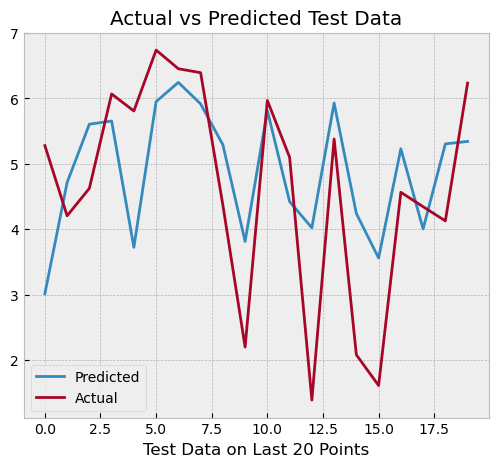

----------------------------------------------------------------------------------------------------
              9680      1036      15918     12255     6161 
y_actual   5.278115  4.204693  4.624973  6.068426  5.808142
y_predict  3.013244  4.714264  5.605658  5.654787  3.723206
error      2.264871 -0.509571 -0.980685  0.413639  2.084936


In [171]:
predict(LinearRegression(), 'LinearRegression', X_train, X_test, y_train, y_test)

#### 2. Lasso Regression

Evaluation Metrics on Train Data
train MSE : 1.105
train RMSE : 1.051
train R2 : 0.449
Evaluation Metrics on Test Data
test MSE : 1.141
test RMSE : 1.068
test R2 : 0.437
----------------------------------------------------------------------------------------------------


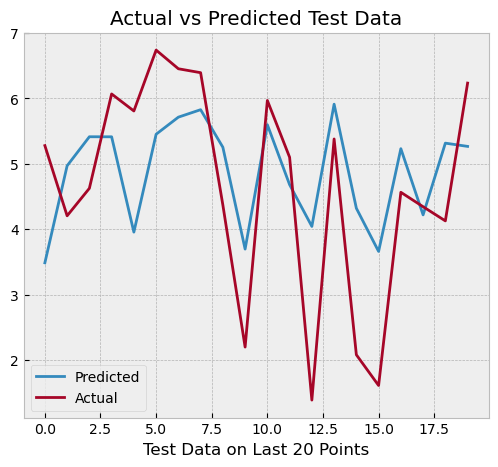

----------------------------------------------------------------------------------------------------
              9680      1036      15918     12255     6161 
y_actual   5.278115  4.204693  4.624973  6.068426  5.808142
y_predict  3.485459  4.969775  5.413699  5.413116  3.955403
error      1.792655 -0.765082 -0.788727  0.655309  1.852740


In [172]:
predict(Lasso(alpha=0.1, max_iter=1000), 'Lasso', X_train, X_test, y_train, y_test)

#### 3. Ridge Regression

Evaluation Metrics on Train Data
train MSE : 1.053
train RMSE : 1.026
train R2 : 0.475
Evaluation Metrics on Test Data
test MSE : 1.091
test RMSE : 1.045
test R2 : 0.461
----------------------------------------------------------------------------------------------------


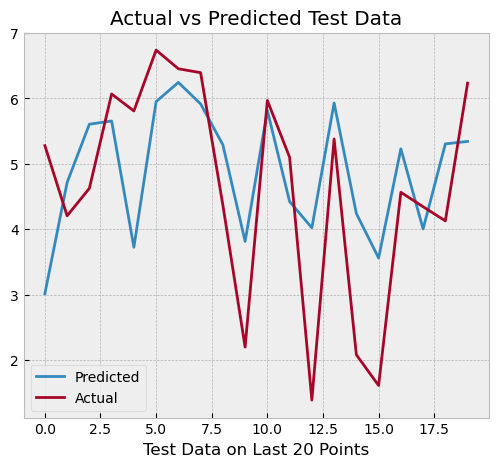

----------------------------------------------------------------------------------------------------
              9680      1036      15918     12255     6161 
y_actual   5.278115  4.204693  4.624973  6.068426  5.808142
y_predict  3.013256  4.714263  5.605652  5.654777  3.723215
error      2.264858 -0.509570 -0.980679  0.413649  2.084928


In [173]:
predict(Ridge(alpha=0.1, max_iter=1000), 'Ridge', X_train, X_test, y_train, y_test)

#### 4. Elastic Net

Evaluation Metrics on Train Data
train MSE : 1.078
train RMSE : 1.038
train R2 : 0.462
Evaluation Metrics on Test Data
test MSE : 1.116
test RMSE : 1.056
test R2 : 0.449
----------------------------------------------------------------------------------------------------


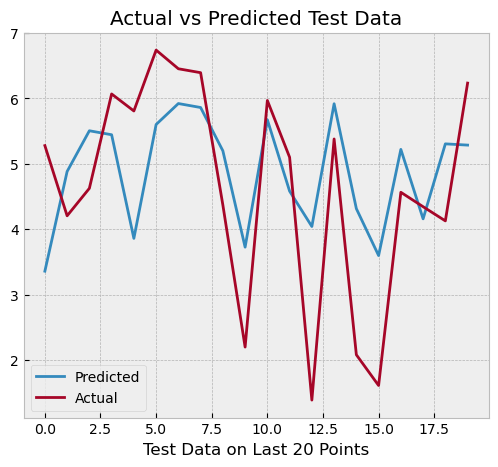

----------------------------------------------------------------------------------------------------
              9680      1036      15918     12255     6161 
y_actual   5.278115  4.204693  4.624973  6.068426  5.808142
y_predict  3.357840  4.882593  5.505368  5.444453  3.859493
error      1.920275 -0.677900 -0.880395  0.623973  1.948649


In [174]:
predict(ElasticNet(alpha=0.1, max_iter=1000), 'Elastic Net', X_train, X_test, y_train, y_test)

#### 5. Decision Tree

Evaluation Metrics on Train Data
train MSE : 0.166
train RMSE : 0.407
train R2 : 0.917
Evaluation Metrics on Test Data
test MSE : 0.208
test RMSE : 0.456
test R2 : 0.897
----------------------------------------------------------------------------------------------------


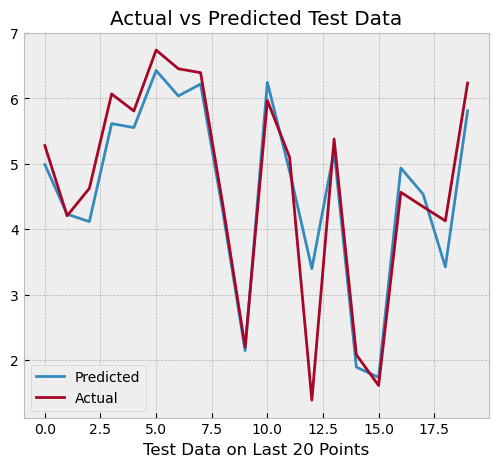

----------------------------------------------------------------------------------------------------
              9680      1036      15918     12255     6161 
y_actual   5.278115  4.204693  4.624973  6.068426  5.808142
y_predict  4.988625  4.229040  4.116385  5.614700  5.554176
error      0.289490 -0.024348  0.508588  0.453725  0.253967


In [175]:
predict(DecisionTreeRegressor(min_samples_leaf=20, min_samples_split=3,max_depth=20, random_state=33), 'Decision Tree', X_train, X_test, y_train, y_test)

#### 6. Random Forest

####  Hyperparameter Tunning using GridSearchCV

In [168]:
param_grid = {'n_estimators': [50,80],
             'max_depth': [15,20],      
             'min_samples_split': [5,15],
             'min_samples_leaf': [3,5]}  

rf = RandomForestRegressor()

# Use GridSearchCV to Perform a Grid Search over the Parameter Grid
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5, scoring='r2')

# Fit the Model to the Training Data
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [15, 20], 'min_samples_leaf': [3, 5],
                         'min_samples_split': [5, 15],
                         'n_estimators': [50, 80]},
             scoring='r2')

In [103]:
rf_optimal_model = grid_search.best_estimator_
rf_optimal_model

RandomForestRegressor(max_depth=15, min_samples_leaf=3, min_samples_split=5,
                      n_estimators=50)

Evaluation Metrics on Train Data
train MSE : 0.069
train RMSE : 0.263
train R2 : 0.965
Evaluation Metrics on Test Data
test MSE : 0.15
test RMSE : 0.387
test R2 : 0.926
----------------------------------------------------------------------------------------------------


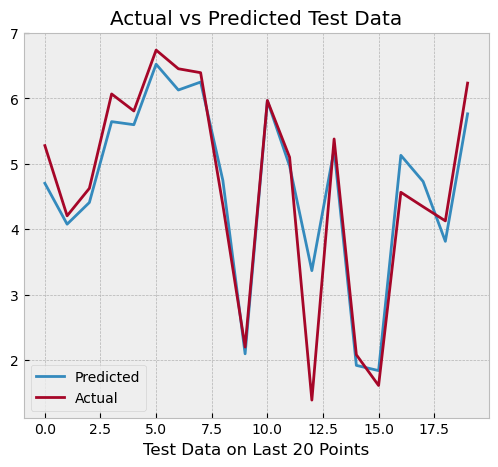

----------------------------------------------------------------------------------------------------
              9680      1036      15918     12255     6161 
y_actual   5.278115  4.204693  4.624973  6.068426  5.808142
y_predict  4.701878  4.076756  4.408305  5.644999  5.598144
error      0.576237  0.127936  0.216668  0.423427  0.209998


In [176]:
predict(rf_optimal_model, 'Random Forest', X_train, X_test, y_train, y_test)

In [105]:
# Feature Importance 
importances = rf_optimal_model.feature_importances_

# Creating a Dictonary 
importance_dict = {'Feature' : list(X.columns),
                   'Feature Importance' : importances}

# Creating the Dataframe
importance = pd.DataFrame(importance_dict)
sorting_features = importance.sort_values(by=['Feature Importance'],ascending=False)
sorting_features

Feature  Feature Importance
2          hr            0.773381
7        temp            0.090315
5  workingday            0.049488
8         hum            0.026646
1        mnth            0.014233
0      season            0.012869
9   windspeed            0.012622
4     weekday            0.012546
6  weathersit            0.006298
3     holiday            0.001601

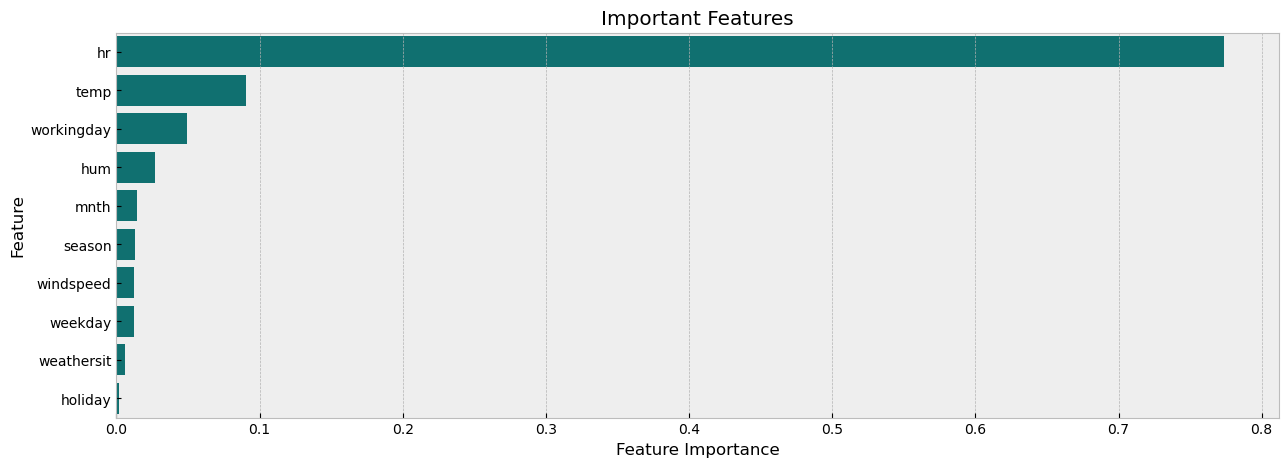

In [106]:
plt.figure(figsize=(15,5))
bar = sns.barplot(x='Feature Importance', y='Feature', data=sorting_features, color='teal')
bar.set_title('Important Features')
plt.show()

#### 7. Xtreme Gradient Boosting

#### HyperParameter Tunning using GridSearchCV

In [132]:
param_grid = {'n_estimators': [100,300,500],     
             'max_depth': [5,7,8],            
             'min_samples_leaf': [1,3,5]}     

# Initialize the RandomForestRegressor Model
xgb = XGBRegressor()

# Use GridSearchCV to perform a Grid Search over the Parameter Grid
grid_search = GridSearchCV(xgb, param_grid=param_grid, cv=5, scoring='r2')

# Fit the Model to the Training Data
grid_search.fit(X, y)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'max_depth': [5, 7, 8], 'min_samples_leaf': [1, 3, 5],
                         'n_estimators': [100, 300, 500]},
             scoring='r2')

In [133]:
xgb_optimal_model = grid_search.best_estimator_
xgb_optimal_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, min_samples_leaf=1, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

Evaluation Metrics on Train Data
train MSE : 0.091
train RMSE : 0.302
train R2 : 0.955
Evaluation Metrics on Test Data
test MSE : 0.13
test RMSE : 0.361
test R2 : 0.936
----------------------------------------------------------------------------------------------------


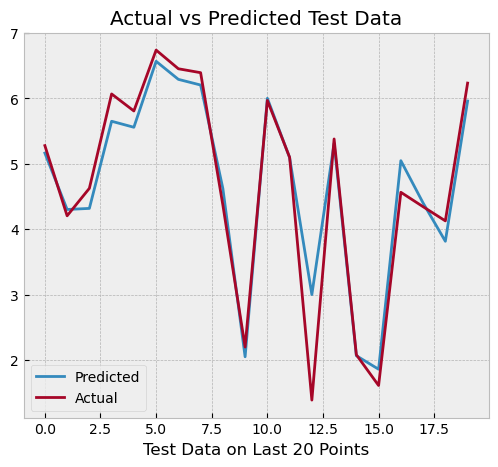

----------------------------------------------------------------------------------------------------
              9680      1036      15918     12255     6161 
y_actual   5.278115  4.204693  4.624973  6.068426  5.808142
y_predict  5.164113  4.301393  4.317996  5.650795  5.558842
error      0.114002 -0.096700  0.306977  0.417631  0.249300


In [177]:
predict(xgb_optimal_model, 'XGB', X_train, X_test, y_train, y_test)

### Model Result

In [178]:
model_result = pd.DataFrame(model_result)
# Sorting the Values by Test R2 score
model_result.sort_values(by='test R2', ascending=False)

model  train MSE  train RMSE  train R2  test RMSE  test R2
6               XGB      0.091       0.302     0.955      0.361    0.936
5     Random Forest      0.069       0.263     0.965      0.387    0.926
4     Decision Tree      0.166       0.407     0.917      0.456    0.897
0  LinearRegression      1.053       1.026     0.475      1.045    0.461
2             Ridge      1.053       1.026     0.475      1.045    0.461
3       Elastic Net      1.078       1.038     0.462      1.056    0.449
1             Lasso      1.105       1.051     0.449      1.068    0.437

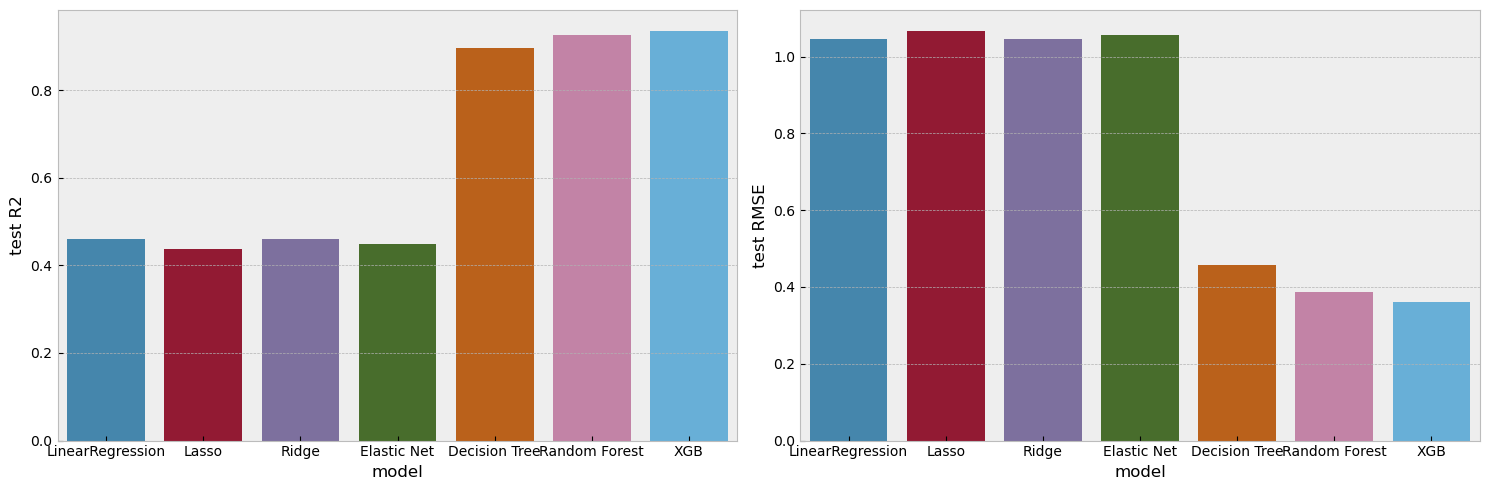

In [179]:
# Plotting Graph to Compare Model Performance
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.barplot(x=model_result['model'], y=model_result['test R2'], ax=ax[0])           
sns.barplot(x=model_result['model'], y=model_result['test RMSE'], ax=ax[1])
plt.tight_layout()

In [180]:
import pickle

In [181]:
import joblib

# Save the trained model as a .pkl file
joblib.dump(xgb_optimal_model, 'xgb_optimal_model.pkl')

['xgb_optimal_model.pkl']

In [182]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']